# London House Price Prediction using a Decision Tree Regressor

## Contents

0. [Introduction, Aims, & Summary](#0.-Introduction,-Aims,-&-Summary)
1. [Importing Packages](#1.-Importing-Packages)  
2. [Reading in Data](#2.-Reading-in-Data-&-First-Look)  
3. [Cleaning Data](#3.-Cleaning-Data)  
   3.1. [Price Cleaning](#3.1.-Price-Cleaning)  
   3.2. [Postcode Identification & Cleaning](#3.2.-Postcode-Identification-&-Cleaning)  
   3.3. [Date Added Cleaning](#3.3.-Date-Added-Cleaning)  
   3.4. [Property Type Cleaning](#3.4.-Property-Type-Cleaning)  
   3.5. [Outlier Checking & Removal](#3.5.-Outlier-Checking-&-Removal)  
   3.6. [Removing Nulls](#3.6.-Removing-Nulls)  
4. [Transforming Categorical Variable Columns into Multiple Binary Columns](#4.-Transforming-Categorical-Variable-Columns-into-Multiple-Binary-Columns)  
5. [Training, Improving, & Testing Model](#5.-Training,-Improving,-&-Testing-Model)   
   5.1. [Training Model](#5.1.-Training-Model)  
   5.2. [Improving the Model by Tuning Hyperparameters](#5.2.-Improving-the-Model-by-Tuning-Hyperparameters)  
   5.3. [Visualising & Examining the Tree](#5.3.-Visualising-&-Examining-the-Tree)  
   5.4. [Comparing Feature Importance](#5.4.-Comparing-Feature-Importance)  
   5.5. [Assessing Tuned Model Accuracy](#5.5.-Assessing-Tuned-Model-Accuracy)  
6. [Simple Linear Regression Model using Area for Comparison](#6.-Simple-Linear-Regression-Model-using-Area-for-Comparison)  
7. [Conclusions & Next Steps](#7.-Conclusions-&-Next-Steps)

## 0. Introduction, Aims, & Summary

In this project I took the [Real Estate Data London 2024](https://www.kaggle.com/datasets/kanchana1990/real-estate-data-london-2024) dataset, with thanks to Kanchana1990 for pulling the data from the [Rightmove website](https://www.rightmove.co.uk/), in order to create a decision tree regressor using Python library sklearn.

My aim was to produce a model that, given a set of property features included in this dataset, would be able to accurately and reliably predict the actual listed sale price of this property on Rightmove, while also demonstrating, explaining, and examing the decision tree model process.

After the usual importing of packages and reading our data in ([1](#1.-Importing-Packages) and [2](#2.-Reading-in-Data-&-First-Look)), I first of all examined our data, cleaned it, and prepared it for use in our model ([2](#2.-Reading-in-Data-&-First-Look), [3](#3.-Cleaning-Data) and [4](#4.-Transforming-Categorical-Variable-Columns-into-Multiple-Binary-Columns)). I then trained the model, improved it by fine-tuning its parameters, and assessed its accuracy, with an added comparison to a simple linear regression model to give a better feel on whether creating a decision tree model was worth it for a problem such as this ([5](#5.-Training,-Improving,-&-Testing-Model) and [6](#6.-Simple-Linear-Regression-Model-using-Area-for-Comparison)). Finally, I concluded the project by reflecting on how accurate the model was on test data, where it could have been improved, and what the next steps should be were I to continue trying to accurately predict London house prices into the future ([7](#7.-Conclusions-&-Next-Steps)).

In the end, the model had an R squared value when comparing its predicted property prices to those of a test set of 0.66, with am average absolute error of 21.77%. While this is far better than simply guessing house prices at random or that each house price is equal to the mean, and is also better than our simple comparison linear regression model with an R squared of 0.41 and average absolute error of 35.15%, it still leaves a lot to be desired and we would want to improve this model before using it as a practical guide to property prices in London.

The primary steps to do this I identified in the conclusion for doing this are to increase the amount of data available as 1019 data entries is a low number for a prediction with this much complexity, and to use a random forest with many decision trees in order use the data we do have to greater effect in hopefully finding a better combination of features for a more accurate model. While there is undoubtedly additional hyperparameter fine tuning or feature creation from the available data I could do to make limited improvements to the model I already have, I think getting more data and at least trialling a random forest model would be the first things to do moving forward.

Overall I am happy with this project, and while the model itself has room for improvement, it has demonstrated what a decision tree does, how it works, and why they can be such a powerful in not only categorizations but in regression predictions as well.

[Back to Contents](#Contents)

## 1. Importing Packages

Standard step for importing the required packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.tree import DecisionTreeRegressor, _tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import tree

[Back to Contents](#Contents)

## 2. Reading in Data & First Look

Loading in the data as dataframe 'df' and some basic exploration of the broad structure of the data. Also a slightly more in depth look at a couple of values in the 'title' and 'descriptionHtml' columns. As these are longer text strings they are not fully shown by df.head(), and so it will be good to have a closer look and possibly try and extract some more useful information out of them in the next step: [3. Cleaning Data](#3.-Cleaning-Data)

In [2]:
df = pd.read_csv('realestate_data_london_2024_nov.csv')

In [3]:
df.head()

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,"£24,950,000"
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,"£29,500,000"
2,Reduced on 22/02/2024,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,"£25,000,000"
3,08/04/2024,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,"£24,950,000"
4,Reduced on 11/07/2023,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,"£24,950,000"


In [4]:
df.tail()

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price
1014,Added today,3 bedroom apartment for sale in Battersea Powe...,NO STAMP DUTY This stunning penthouse apartmen...,Apartment,2601.0,3.0,4.0,new,"£6,500,000"
1015,Reduced on 11/07/2024,"6 bedroom house for sale in Winnington Close, ...",We are pleased to bring to the market for the ...,House,NaN,6.0,4.0,price_reduced,"£6,500,000"
1016,28/08/2024,"3 bedroom apartment for sale in Vicarage Gate,...","Welcome to 2 Vicarage Gate House, a sophistica...",Apartment,2508.0,3.0,3.0,new,"£6,500,000"
1017,Reduced on 12/08/2024,"3 bedroom house for sale in Chester Row, Belgr...",A fantastic opportunity to purchase an immacul...,House,NaN,3.0,3.0,price_reduced,"£6,500,000"
1018,Reduced on 27/09/2024,"4 bedroom property for sale in Hans Place, Kni...",Situated in one of London's most prestigious g...,Not Specified,3352.0,4.0,3.0,price_reduced,"£6,500,000"


In [5]:
df.describe()

,sizeSqFeetMax,bedrooms,bathrooms
count,869.000000,1003.000000,984.000000
mean,5232.871116,5.111665,4.648374
std,11796.770144,3.264992,3.085809
min,425.000000,1.000000,1.000000
25%,2885.000000,3.000000,3.000000
50%,3834.000000,5.000000,4.000000
75%,5745.000000,6.000000,5.000000
max,336989.000000,66.000000,66.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   addedOn              1011 non-null   object 
 1   title                1019 non-null   object 
 2   descriptionHtml      1019 non-null   object 
 3   propertyType         1019 non-null   object 
 4   sizeSqFeetMax        869 non-null    float64
 5   bedrooms             1003 non-null   float64
 6   bathrooms            984 non-null    float64
 7   listingUpdateReason  1019 non-null   object 
 8   price                1019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 71.8+ KB


In [7]:
first_title = df['title'].iloc[0]
last_title = df['title'].iloc[-1]
print(first_title)
print()
print(last_title)

8 bedroom house for sale in Winnington Road, Hampstead, London, N2, United Kingdom, N2

4 bedroom property for sale in Hans Place, Knightsbridge, London, SW1X., SW1X


In [8]:
first_description = df['descriptionHtml'].iloc[0]
last_description = df['descriptionHtml'].iloc[-1]
print(first_description)
print()
print(last_description)

<br />Situated in one of Hampstead’s most prestigious and peaceful settings, the property lies in one of London’s leafiest and greenest locations, while still within easy reach of Central London. Hampstead Village, with its array of boutique shops, cafes, and restaurants, is just a short distance away, while Hampstead Heath offers expansive green spaces for outdoor activities. The area is also well-served by excellent schools and transport links, providing quick access to the City and the West End.

Situated in one of London's most prestigious garden squares, this triplex-style apartment, with a long lease of 113 years, seamlessly blends historical charm with modern sophistication.<br /><br />As you enter the apartment, a striking staircase creates a grand entrance, setting the tone for the elegant interiors. The spacious and naturally lit drawing room offers grand proportions and lovely views of the communal gardens, providing a tranquil setting for relaxation and entertaining. Adjace

Overall the data is relatively complete for real world publicly available data of thise kind, with the 'sizeSqFeetMax' column the biggest immediate issue with around 15% of the values missing. However, with only 1019 rows of data (before cleaning and outlier removal) and so there will be limits to how effective a decision tree regression can be. I will still carry on with the project though as it will be fun to see how accurate we can get a decision tree with it.

Given the small number of data points though I will probably stick to a training set and test set rather than also having a validation set to tune up parameters (although I may come back to this in the modelling stage and adjust!). While this isn't ideal and will limit my ability to properly test the model with fresh, independent data, given the small size of the set and what will likely turn into a lot of different features (e.g. many different property types), I feel it is the best route forward for now. Perhaps in the future I can pull my own, larger set of data for this purpose!

As for the two specific columns looked at more closely 'title' and 'descriptionHtml', I think 'title' will be useful in order to extract the outcode portion of the properties' postcode after the final comma. As for 'descriptionHtml', I can imagine a fun, much bigger project with much more data pulling out keywords from this longer description and seeing the impact they have (if any) on price. Off the top of my head and from looking at the two above: 'prestigious', 'garden', 'bath', 'east-facing', and 'historical' might all be interesting places to start. Again though, given the low volume of data and amount of variables this would undoubtedly generate, this is a project for another day.

On to cleaning the data!

[Back to Contents](#Contents)

## 3. Cleaning Data

Having had a quick overview of the data, we now need to clean it up! This section will be divided into subsections for each column that needs to be cleaned.

[Back to Contents](#Contents)

### 3.1. Price Cleaning 

Immediately from the initial overview of the data we can see that 'price' is not a numeric variable and this will need to be changed, with the '£' and ',' needing to be removed first.

With 'price' as our target variable, this is an essential first step in getting a useable dataframe as you cannot to regression on non-numeric values.

In [9]:
# The 'price' column has '£' signs and commas, which are removed. The column is then converted to numeric.
df['price'] = pd.to_numeric(
                            df['price'].str.replace('£', '', regex=False).str.replace(',', '', regex=False),
                            errors='coerce'
                            )

[Back to Contents](#Contents)

### 3.2. Postcode Identification & Cleaning

As noted at the end of "2. Reading in Data & First Look", we can see from looking in detail at the 'title' column that at the end of it after the last comma we can see the outcode (first three or four digits of a UK postcode) of the properties for sale. This will be excellent to extract and use to see if their is any significant geographic signficance of home prices visible from the data available.

In [10]:
# Extract the postcode from the 'title' column by splitting the text at the last comma.
df['postcode'] = df['title'].str.rsplit(',', n=1).str[-1].str.strip()

In [11]:
# Get unique postcodes
unique_postcodes = df['postcode'].unique()
print(unique_postcodes)

['N2' 'W1J' 'SW1W' 'NW8' 'SW1X' 'NW1' 'W1B' 'SW7' 'TW1' 'W1K' 'SW10' 'N6'
 'W11' 'W1S' 'SW1E' 'E15' 'W8' 'SW1A' 'NW7' 'NW3' 'W1H' 'SW3' 'E14'
 '7 bedroom villa for sale in Holland VIllas W14' 'W14' 'W2' 'W9' 'EC1V'
 'NW10' 'E20' 'SW5' 'W1G' 'N10' 'SW19' 'WC2N' 'NW11' "St John's Wood NW8"
 'Hampstead NW3' 'W1U' 'SW16' 'South Kensington SW7' 'SW1V'
 'Isle Of Dogs E14' 'W3' 'SW6' 'SE1' 'WC2R' 'NW6' 'SE13' 'W1W' 'SW18'
 'SW15' 'SW8' 'SW1P' 'Nine Elms SW8' 'Chelsea SW3' 'Kensington W8'
 '6 bedroom terraced house for sale in Herbert Crescent Knightsbridge SW1X'
 'SW17' 'London SW1W' 'EC2A' 'TW7' 'SE17' 'WC1X' 'SE21' 'N3' 'E10' 'SW13'
 '30 bedroom terraced house for sale in London W10' 'SW11' 'E16' 'NW4'
 'WC2A' 'W12' 'WC1A' 'N20' 'London SW8' 'WC1N' 'WC2E' 'SE8' 'NW2'
 '2 bedroom apartment for sale in Hanover Square Mayfair W1S' 'N21' 'W1D'
 'SE23' 'Knightsbridge SW7' 'London SW10' 'East Finchley N2' 'TW9' 'E4'
 'Notting Hill W11' 'SE22' 'TW10' 'N1' 'Belgravia SW1W' 'SE18'
 'London NW8' 'Lon

In [12]:
# Regex pattern to capture outward UK postcodes
postcode_pattern = re.compile(r'\b[A-Z]{1,2}\d{1,2}[A-Z]?\b')

# Function to extract last postcode
def extract_postcode(text):
    matches = postcode_pattern.findall(text.upper())
    return matches[-1] if matches else None  # Return last match or None

# Add new column
df['postcode_cleaned'] = df['postcode'].apply(extract_postcode)

# Regex pattern to capture outward UK postcodes
postcode_pattern = re.compile(r'\b[A-Z]{1,2}\d{1,2}[A-Z]?\b')


In [13]:
#Seeing unique postcodes
unique_postcode_cleaned = df['postcode_cleaned'].unique()
print(unique_postcode_cleaned)

['N2' 'W1J' 'SW1W' 'NW8' 'SW1X' 'NW1' 'W1B' 'SW7' 'TW1' 'W1K' 'SW10' 'N6'
 'W11' 'W1S' 'SW1E' 'E15' 'W8' 'SW1A' 'NW7' 'NW3' 'W1H' 'SW3' 'E14' 'W14'
 'W2' 'W9' 'EC1V' 'NW10' 'E20' 'SW5' 'W1G' 'N10' 'SW19' 'WC2N' 'NW11'
 'W1U' 'SW16' 'SW1V' 'W3' 'SW6' 'SE1' 'WC2R' 'NW6' 'SE13' 'W1W' 'SW18'
 'SW15' 'SW8' 'SW1P' 'SW17' 'EC2A' 'TW7' 'SE17' 'WC1X' 'SE21' 'N3' 'E10'
 'SW13' 'W10' 'SW11' 'E16' 'NW4' 'WC2A' 'W12' 'WC1A' 'N20' 'WC1N' 'WC2E'
 'SE8' 'NW2' 'N21' 'W1D' 'SE23' 'TW9' 'E4' 'SE22' 'TW10' 'N1' 'SE18' 'E2'
 'WC1B' 'EN1' 'EC4V' 'WC1H' 'N5' 'SW2' 'SW20' 'E3' 'SW4']


I was originally going to leave it here, but given the lack of data this feels like far too many postcodes to test and so will reduce it down to area codes (blessing in disguise as above cleaning not quite perfect with things like 'WC2A' and 'W1J' slipping through. With a LOT more data would be fun to look at by full outward code though as this probably more likely to have an impact than the much more generic 'W' or 'SW'.

In [14]:

# Function to remove the first digit and everything after it
def remove_after_digit(code):
    match = re.match(r'^[A-Z]+', str(code).upper())
    return match.group(0) if match else None

# Apply the function to the column and replace it
df['postcode_cleaned'] = df['postcode_cleaned'].apply(remove_after_digit)

print(df['postcode_cleaned'].unique())  # Check unique values

['N' 'W' 'SW' 'NW' 'TW' 'E' 'EC' 'WC' 'SE' 'EN']


In [15]:
df = df.drop(['postcode'], axis=1)

df.head()

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,postcode_cleaned
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,24950000.0,N
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,29500000.0,W
2,Reduced on 22/02/2024,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,25000000.0,SW
3,08/04/2024,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,24950000.0,N
4,Reduced on 11/07/2023,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,24950000.0,NW


In [16]:
# Count unique values in a column
counts = df['postcode_cleaned'].value_counts()

# Display as a table (DataFrame)
counts_table = counts.reset_index()
counts_table.columns = ['Value', 'Count']

print(counts_table)

  Value  Count
0    SW    415
1     W    281
2    NW    167
3     N     80
4    EC     22
5    SE     20
6    WC     16
7     E     12
8    TW      5
9    EN      1


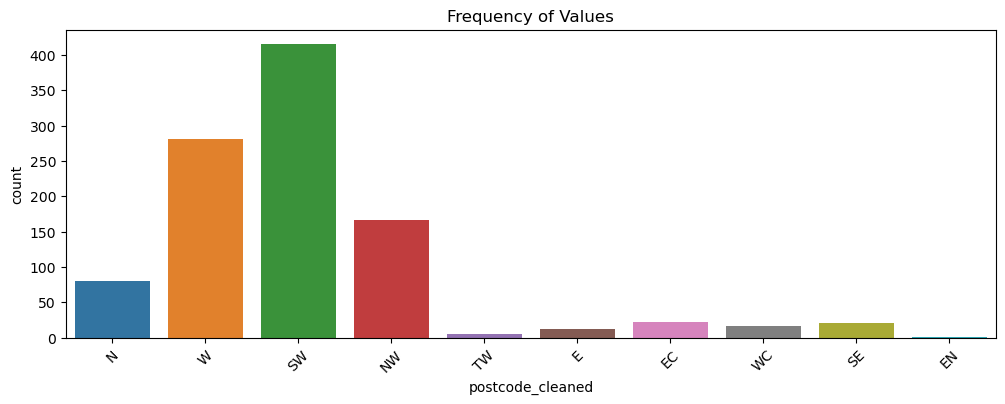

In [17]:
plt.figure(figsize=(12, 4))
sns.countplot(x='postcode_cleaned', data=df)
plt.xticks(rotation=45)
plt.title('Frequency of Values')
plt.show()

Given the wide area covered by each of these postcode categories and small amount of data it is unlikely these parameters will be great for the model. If more data was available/becomes so in the future it might be interesting to put the full outcodes in to use directly, or calculate their latitude and longitude and turn it into a metric of distance from a central point in London. Although due to London's extensive public transport this too might be a red herring, and perhaps the 'distance to tube' information on listings should be pulled next time, as I think this in fact might yield the best metric for accurate predictions.

[Back to Contents](#Contents)

### 3.3. Date Added Cleaning

We can see below that although most of the entries in the 'addedOn' column are pretty clean and follow a consistent date structure, some of them have a 'Reduced on ' at the start. While we could probably just remove this exact text specifically as it seems to be the only inconsistency, it is safer and easier to just keep the date and get rid of everything else as below. This also has the added bonus that it should future-proof any more property data we add later (although in that case it would need to be checked in case the data format changes e.g. to YYYY/MM/DD).

We will also add some more date features such as 'month' and 'quarter' in order to better categorise the data as features.

In [18]:
unique_added_on = df['addedOn'].unique()
print(unique_added_on)

['10/10/2024' 'Reduced on 24/10/2024' 'Reduced on 22/02/2024' '08/04/2024'
 'Reduced on 11/07/2023' '05/10/2024' '27/06/2024' '02/04/2024'
 'Reduced on 10/02/2022' '27/09/2024' '05/07/2024' '24/04/2023'
 '19/04/2023' '18/04/2024' '16/02/2024' '25/01/2024'
 'Reduced on 06/06/2024' 'Reduced on 23/01/2024' '17/04/2024'
 'Reduced on 25/10/2024' '06/02/2024' '08/07/2024' '01/08/2024'
 '14/06/2024' nan '03/11/2023' '05/10/2023' '08/08/2023' '07/06/2024'
 '25/09/2024' '29/07/2024' '20/10/2023' '04/09/2024' '24/10/2024'
 '11/06/2024' '30/10/2023' '12/10/2023' '02/05/2023' '10/09/2024'
 '09/09/2024' '03/10/2024' '02/09/2024' 'Reduced on 07/10/2024'
 '03/06/2024' '26/07/2024' 'Reduced on 25/03/2024' '25/03/2024'
 '31/10/2023' 'Reduced on 29/08/2023' '24/09/2024' '03/07/2024'
 '08/10/2024' '18/05/2024' '09/10/2023' 'Reduced on 04/04/2024'
 '23/04/2024' '16/10/2024' 'Reduced on 05/04/2024' '23/02/2022'
 '09/02/2024' '21/06/2024' 'Reduced on 23/06/2023' '19/09/2024'
 'Reduced on 26/06/2024' 'Reduce

In [19]:
# Regex pattern to find dates in dd/mm/yyyy format to remove 'Reduced on' and any other irregularities
date_pattern = re.compile(r'\b\d{2}/\d{2}/\d{4}\b')

# Function to extract date or return None
def extract_date(text):
    match = date_pattern.search(str(text))
    return match.group() if match else None

# Add new column
df['added_date'] = df['addedOn'].apply(extract_date)
df['added_date'] = pd.to_datetime(df['added_date'], format='%d/%m/%Y', errors='coerce')

# Drop original date column
df = df.drop('addedOn', axis=1)

df.head()

,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,postcode_cleaned,added_date
0,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,24950000.0,N,2024-10-10
1,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,29500000.0,W,2024-10-24
2,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,25000000.0,SW,2024-02-22
3,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,24950000.0,N,2024-04-08
4,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,24950000.0,NW,2023-07-11


In [20]:
def create_calendar_features(df):
    df = df.copy()
    df['quarter'] = df['added_date'].dt.quarter
    #df['month'] = df['added_date'].dt.month
    #df['year'] = df['added_date'].dt.year
    #df['weekofyear'] = df['added_date'].dt.isocalendar().week
    return df

df = create_calendar_features(df)
df.head()

,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,postcode_cleaned,added_date,quarter
0,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,24950000.0,N,2024-10-10,4.0
1,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,29500000.0,W,2024-10-24,4.0
2,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,25000000.0,SW,2024-02-22,1.0
3,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,24950000.0,N,2024-04-08,2.0
4,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,24950000.0,NW,2023-07-11,3.0


I originally added more calendar features but as they overlap in effect and the data is limited decided to stick with just a 'quarter' value.

### 3.4. Property Type Cleaning

As we can see below, there are far too many property types here with too few counts. Given the already discussed low number of data points if all of these propert types are looked at individually alongside all the outcodes etc. we would end up with a decision tree with a thousand leaves with a single unique set of features on each. While this might lead to a model that 'seem' accurate on the training data, it will almost certainly fall down on the test set due to gross overfitting.

As such, this plethora of property types should be grouped into 'Detached House', 'Attached House, 'Flat', 'Penthouse', 'Other' as below to create fewer potential features in our model and hopefully lead to more consistent accuracy. The "Block of Apartments" is to be removed, as it is clearly not listing a single home, but many.

In [21]:
# Count unique values in a column
counts = df['propertyType'].value_counts()

# Display as a table (DataFrame)
counts_table = counts.reset_index()
counts_table.columns = ['Value', 'Count']

print(counts_table)

                  Value  Count
0             Apartment    243
1              Detached    152
2              Terraced    151
3                  Flat    127
4                 House    110
5             Penthouse     94
6         Semi-Detached     37
7            Town House     29
8        End of Terrace     20
9                Duplex     10
10        Not Specified      8
11  Block of Apartments      7
12                 Land      6
13                 Mews      6
14           Maisonette      6
15                Villa      4
16  Link Detached House      3
17                 Plot      2
18  Equestrian Facility      2
19   Character Property      1
20          Ground Flat      1


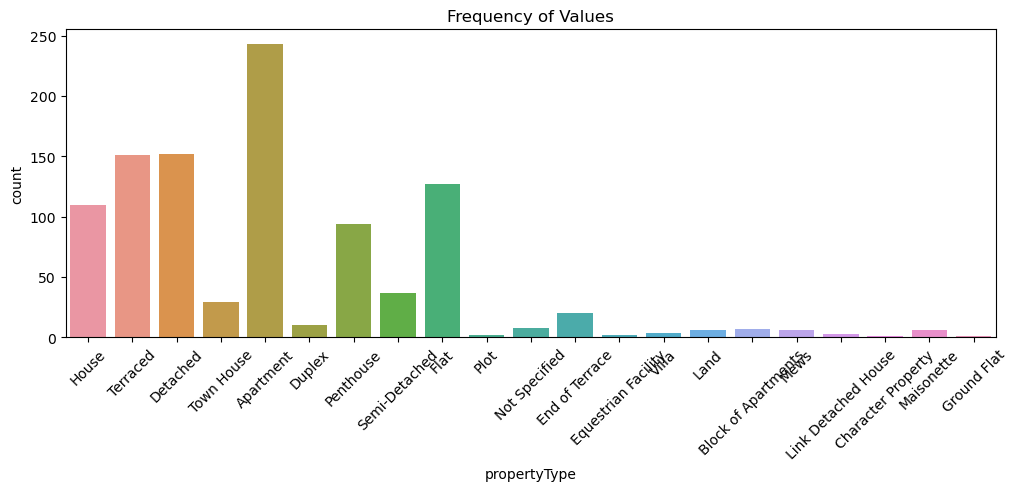

In [22]:
plt.figure(figsize=(12, 4))
sns.countplot(x='propertyType', data=df)
plt.xticks(rotation=45)
plt.title('Frequency of Values')
plt.show()

In [23]:
# Mapping to categories
category_map = {
    'Detached': 'Detached House',
    'Link Detached House': 'Detached House',
    'Town House': 'Attached House',
    'House': 'Attached House',
    'Villa': 'Detached House',

    'Terraced': 'Attached House',
    'Semi-Detached': 'Attached House',
    'End of Terrace': 'Attached House',
    'Mews': 'Attached House',

    'Apartment': 'Flat',
    'Flat': 'Flat',
    'Duplex': 'Flat',
    'Maisonette': 'Flat',

    'Penthouse': 'Penthouse',

    'Not Specified': 'Other'
}

# Filter out "Block of Apartments"
df = df[df['propertyType'] != 'Block of Apartments']

# Create a new column with the mapped categories
df['property_type_cleaned'] = df['propertyType'].map(category_map)

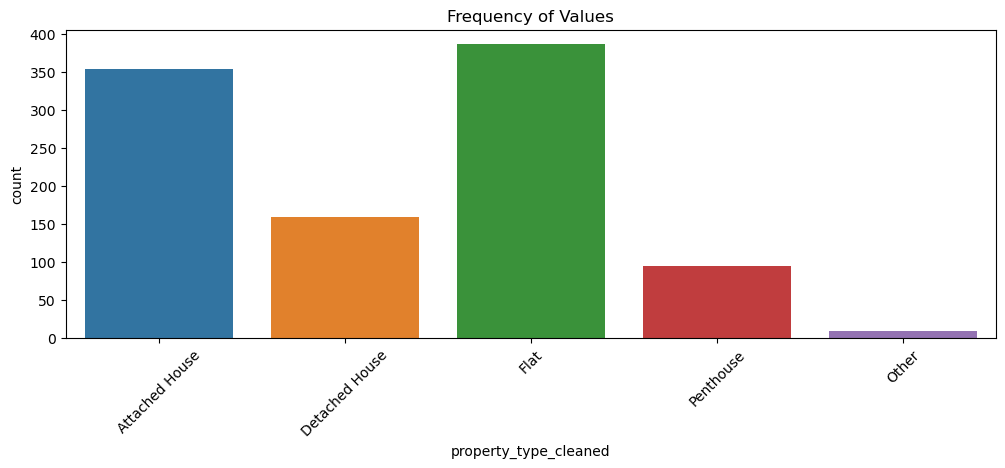

In [24]:
plt.figure(figsize=(12, 4))
sns.countplot(x='property_type_cleaned', data=df)
plt.xticks(rotation=45)
plt.title('Frequency of Values')
plt.show()

In [25]:
df = df.drop(['propertyType'], axis=1)

df.head()

,title,descriptionHtml,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,postcode_cleaned,added_date,quarter,property_type_cleaned
0,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",16749.0,8.0,8.0,new,24950000.0,N,2024-10-10,4.0,Attached House
1,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",12960.0,7.0,7.0,price_reduced,29500000.0,W,2024-10-24,4.0,Attached House
2,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,6952.0,6.0,6.0,price_reduced,25000000.0,SW,2024-02-22,1.0,Attached House
3,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,16749.0,6.0,6.0,new,24950000.0,N,2024-04-08,2.0,Detached House
4,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",10241.0,8.0,10.0,price_reduced,24950000.0,NW,2023-07-11,3.0,Detached House


[Back to Contents](#Contents)

### 3.5. Outlier Checking & Removal

Taking a look at the shape of the data to see if there are any obvious outliers, this could be done through statistical methods e.g. interquartile ranges or using standard deviations, but in this case just looking at the data for any obvious points to remove feels more than adequate. After all, a lot of house genuinely are just significantly more expensive than the mean and I don't want to remove these unecessarily, especially with already limited data! 

array([[<Axes: title={'center': 'sizeSqFeetMax'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'added_date'}>,
        <Axes: title={'center': 'quarter'}>]], dtype=object)

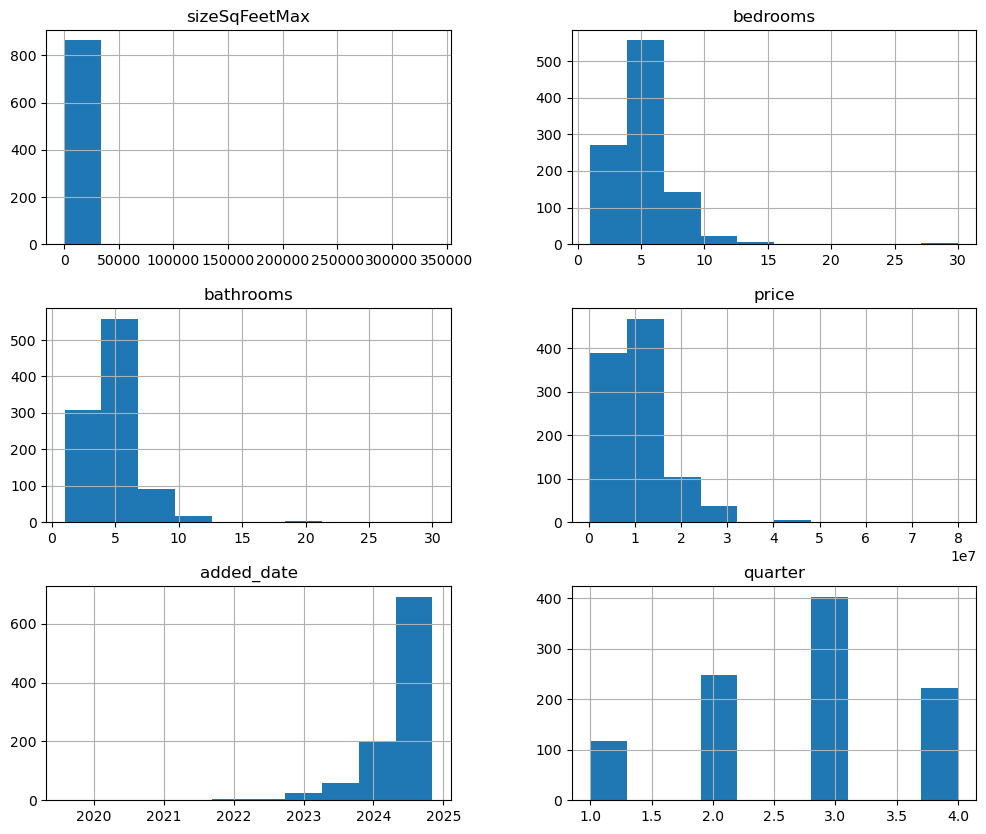

In [26]:
df.hist(figsize=(12, 10))

In [27]:
# Select rows where 'price' is greater than 35000000
price_outliers = df[df['price'] > 35000000]

price_outliers = price_outliers.sort_values(by='price', ascending=False)

price_outliers


,title,descriptionHtml,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,postcode_cleaned,added_date,quarter,property_type_cleaned
46,5 bedroom penthouse for sale in The Knightsbri...,A once in a lifetime opportunity to own one of...,9437.0,5.0,5.0,new,80000000.0,SW,2024-09-02,3.0,Penthouse
44,10 bedroom terraced house for sale in Portland...,"Built in 1775 by Robert Adam, the residence ha...",20987.0,10.0,10.0,new,65000000.0,W,2024-10-03,4.0,Attached House
45,"5 bedroom apartment for sale in One Hyde Park,...",An exceptional exclusive five bedroom apartmen...,NaN,5.0,5.0,new,60000000.0,SW,2024-07-05,3.0,Flat
43,8 bedroom end of terrace house for sale in Bal...,A grand double fronted townhouse in the heart ...,9727.0,8.0,4.0,new,49500000.0,W,2024-09-04,3.0,Attached House
41,7 bedroom town house for sale in Whistler Squa...,"A Stunning freehold house of 13,067 square fee...",13067.0,7.0,8.0,new,47000000.0,SW,2024-09-10,3.0,Attached House
42,"6 bedroom house for sale in Whistler Square, C...","Thoughtfully designed, the house is in a histo...",13067.0,6.0,6.0,new,47000000.0,SW,2024-09-09,3.0,Attached House
38,9 bedroom terraced house for sale in Buckingha...,Stunning White Georgian Stucco Fronted 19th Ce...,15845.0,9.0,9.0,new,45000000.0,SW,2023-10-12,4.0,Attached House
39,"6 bedroom property for sale in Belgravia Gate,...",A 2nd-floor lateral apartment providing grand ...,7626.0,6.0,7.0,new,43700000.0,SW,2023-05-02,2.0,Other
35,4 bedroom penthouse for sale in The Mandarin O...,<div><br /><p><strong>Exclusive Penthouse at T...,NaN,4.0,4.0,new,42217600.0,W,2024-10-24,4.0,Penthouse
40,4 bedroom apartment for sale in 22 Hanover Squ...,The Residences at the Mandarin Oriental offers...,3057.0,4.0,NaN,new,42217600.0,W,2024-09-27,3.0,Flat


<Axes: >

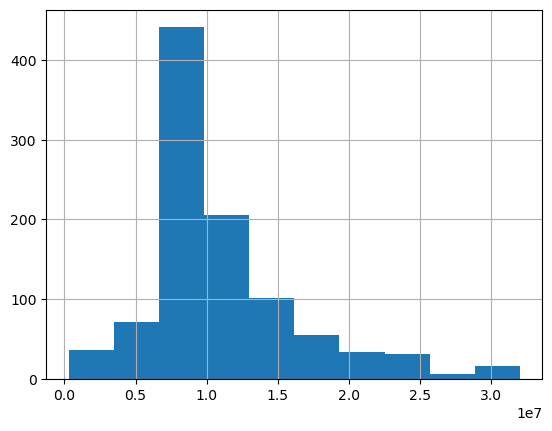

In [28]:
# Filter out where price > 35000000
df = df[df['price'] <= 35000000]


df['price'].hist()

In [29]:
# Select rows where 'price' is greater than 1,000,000
bedroom_outliers = df[df['bedrooms'] > 10]

bedroom_outliers

,title,descriptionHtml,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,postcode_cleaned,added_date,quarter,property_type_cleaned
29,11 bedroom terraced house for sale in FREEHOLD...,An exceptional Six-storey Grade II listed hous...,NaN,11.0,11.0,new,30000000.0,W,2024-06-07,2.0,Attached House
54,14 bedroom terraced house for sale in Lexham G...,"A stunning, substantial property comprising tw...",12575.0,14.0,20.0,new,18500000.0,W,2024-09-24,3.0,Attached House
56,"29 bedroom house for sale in Somerset Court, L...",An exceptional opportunity comprising two cros...,11238.0,29.0,19.0,new,18500000.0,W,2024-10-08,4.0,Attached House
131,12 bedroom detached house for sale in Addison ...,Fantastic opportunity to purchase a spacious d...,6497.0,12.0,6.0,price_reduced,17500000.0,W,2024-10-31,4.0,Detached House
135,"12 bedroom house for sale in Addison Road, Hol...","A superb, detached freehold villa on the iconi...",NaN,12.0,6.0,price_reduced,17500000.0,W,2024-10-31,4.0,Attached House
164,"11 bedroom detached house for sale in Frognal,...",This house enjoys a prominent position just th...,6071.0,11.0,9.0,price_reduced,16950000.0,NW,2024-10-28,4.0,Detached House
459,12 bedroom house for sale in Queen's Gate Plac...,"A large, south facing and very elegant Victori...",8791.0,12.0,8.0,price_reduced,9975000.0,SW,2024-07-17,3.0,Attached House
541,30 bedroom terraced house for sale in London W10,"Introducing a collection of five houses, each ...",NaN,30.0,20.0,new,8900000.0,W,2024-07-12,3.0,Attached House
577,15 bedroom property for sale in Fitzjohns Aven...,An opportunity to purchase a double fronted pe...,NaN,15.0,10.0,new,9000000.0,NW,2024-06-25,2.0,Other
663,"12 bedroom apartment for sale in North Mews, G...",A stunning freehold block with 7 apartments av...,NaN,12.0,NaN,price_reduced,7950000.0,WC,2024-07-22,3.0,Flat


<Axes: >

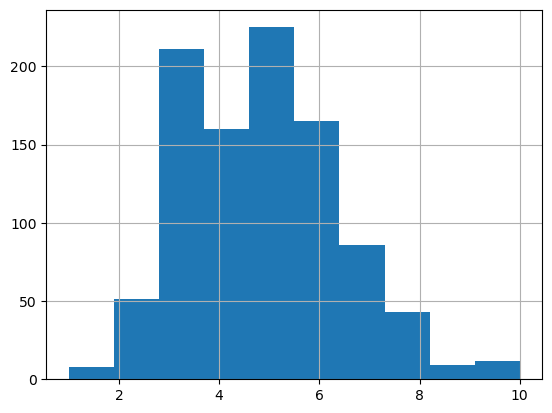

In [30]:
# Filter out where bedrooms > 10
df = df[df['bedrooms'] <= 10]


df['bedrooms'].hist()

<Axes: >

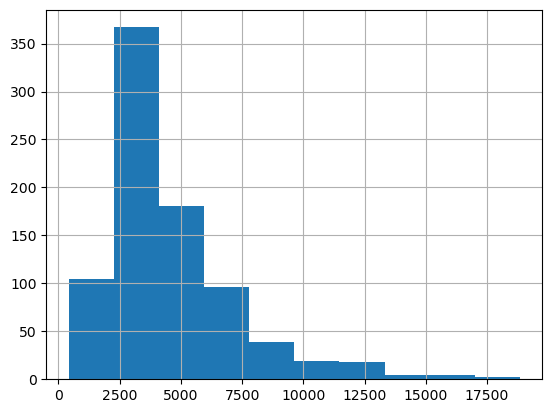

In [31]:
# Filter out where 'sizeSqFeetMax' > 20000
df = df[df['sizeSqFeetMax'] <= 20000]


df['sizeSqFeetMax'].hist()


array([[<Axes: title={'center': 'sizeSqFeetMax'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'added_date'}>,
        <Axes: title={'center': 'quarter'}>]], dtype=object)

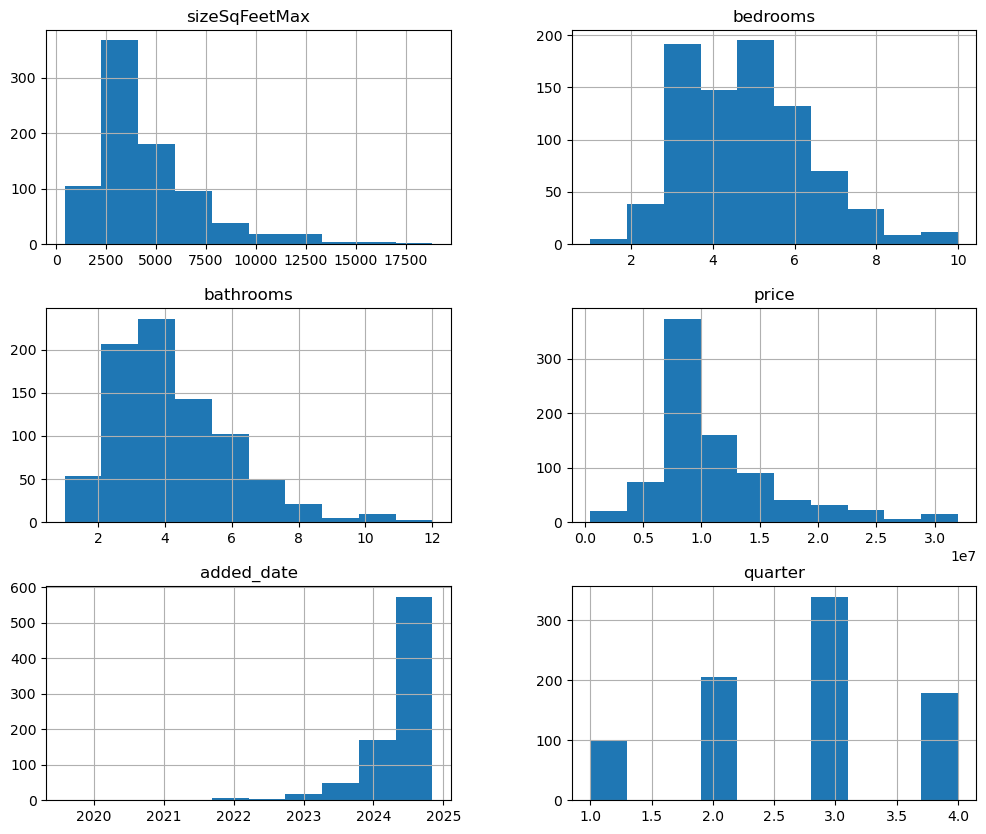

In [32]:
df.hist(figsize=(12, 10))

In [33]:
df = df.drop(['title', 'descriptionHtml', 'added_date'], axis=1)

df.head()

,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price,postcode_cleaned,quarter,property_type_cleaned
0,16749.0,8.0,8.0,new,24950000.0,N,4.0,Attached House
1,12960.0,7.0,7.0,price_reduced,29500000.0,W,4.0,Attached House
2,6952.0,6.0,6.0,price_reduced,25000000.0,SW,1.0,Attached House
3,16749.0,6.0,6.0,new,24950000.0,N,2.0,Detached House
4,10241.0,8.0,10.0,price_reduced,24950000.0,NW,3.0,Detached House


[Back to Contents](#Contents)

### 3.6. Removing Nulls

Getting rid of nulls so that our model can more accurately categorise features. If there were lots of entries with null values it would be worth doing more work to include entries even if one of the columns contained nulls, but as there are only 18 entries to remove after getting rid of outliers and cleaning columns anyway simply removing them is absolutely fine.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sizeSqFeetMax          835 non-null    float64
 1   bedrooms               835 non-null    float64
 2   bathrooms              828 non-null    float64
 3   listingUpdateReason    835 non-null    object 
 4   price                  835 non-null    float64
 5   postcode_cleaned       835 non-null    object 
 6   quarter                824 non-null    float64
 7   property_type_cleaned  835 non-null    object 
dtypes: float64(5), object(3)
memory usage: 58.7+ KB


In [35]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 1018
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sizeSqFeetMax          817 non-null    float64
 1   bedrooms               817 non-null    float64
 2   bathrooms              817 non-null    float64
 3   listingUpdateReason    817 non-null    object 
 4   price                  817 non-null    float64
 5   postcode_cleaned       817 non-null    object 
 6   quarter                817 non-null    float64
 7   property_type_cleaned  817 non-null    object 
dtypes: float64(5), object(3)
memory usage: 57.4+ KB


Retrospectively I should really have removed nulls and outiers before cleaning up my data as would have made the cleaning simpler e.g. removing outliers for bedrooms would have gotten rid of 'block of apartments' for me. Lesson learned for next time!

[Back to Contents](#Contents)

## 4. Transforming Categorical Variable Columns into Multiple Binary Columns

In the last step before we can actually train our model, we will turn our categorical variables remaining (notably 'postcode_cleaned' and 'property_type_cleaned'), into binary variables by creating a series of new columns indicating either a 1 (yes) or 0 (no) for each possible value in the variable. For example, in the new column 'property_type_cleaned_Detached House' every row will be a 0 except for those where in the 'property_type_cleaned' column the value had been 'Detached House', which will now be a 1.

The series of histograms below demonstrate this with for each new column created has the majority of values as 0 with a much smaller number of 1s.

    NOTE: in reality this step could easily be lumped in with training the model, however I chose to separate them out in order to demonstrate what the insertion of binary columns looks like at a practical level with the histograms below. Hopefully this makes it more intuitive to understand what the decision tree will be looking at for each entry.

    Also, this allows us to create a heat map with all of the separated out columns to give us an indication of which factors are perhaps most likely to affect our model. While this could be done in the training section it feels neater to keep the training section just for training, and not speculation. A further discussion of the heat map is at the bottom of this section.

In [36]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

array([[<Axes: title={'center': 'sizeSqFeetMax'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'quarter'}>,
        <Axes: title={'center': 'listingUpdateReason_price_reduced'}>,
        <Axes: title={'center': 'postcode_cleaned_EC'}>,
        <Axes: title={'center': 'postcode_cleaned_N'}>],
       [<Axes: title={'center': 'postcode_cleaned_NW'}>,
        <Axes: title={'center': 'postcode_cleaned_SE'}>,
        <Axes: title={'center': 'postcode_cleaned_SW'}>,
        <Axes: title={'center': 'postcode_cleaned_TW'}>],
       [<Axes: title={'center': 'postcode_cleaned_W'}>,
        <Axes: title={'center': 'postcode_cleaned_WC'}>,
        <Axes: title={'center': 'property_type_cleaned_Detached House'}>,
        <Axes: title={'center': 'property_type_cleaned_Flat'}>],
       [<Axes: title={'center': 'property_type_cleaned_Other'}>,
        <Axes: title={'center': 'pro

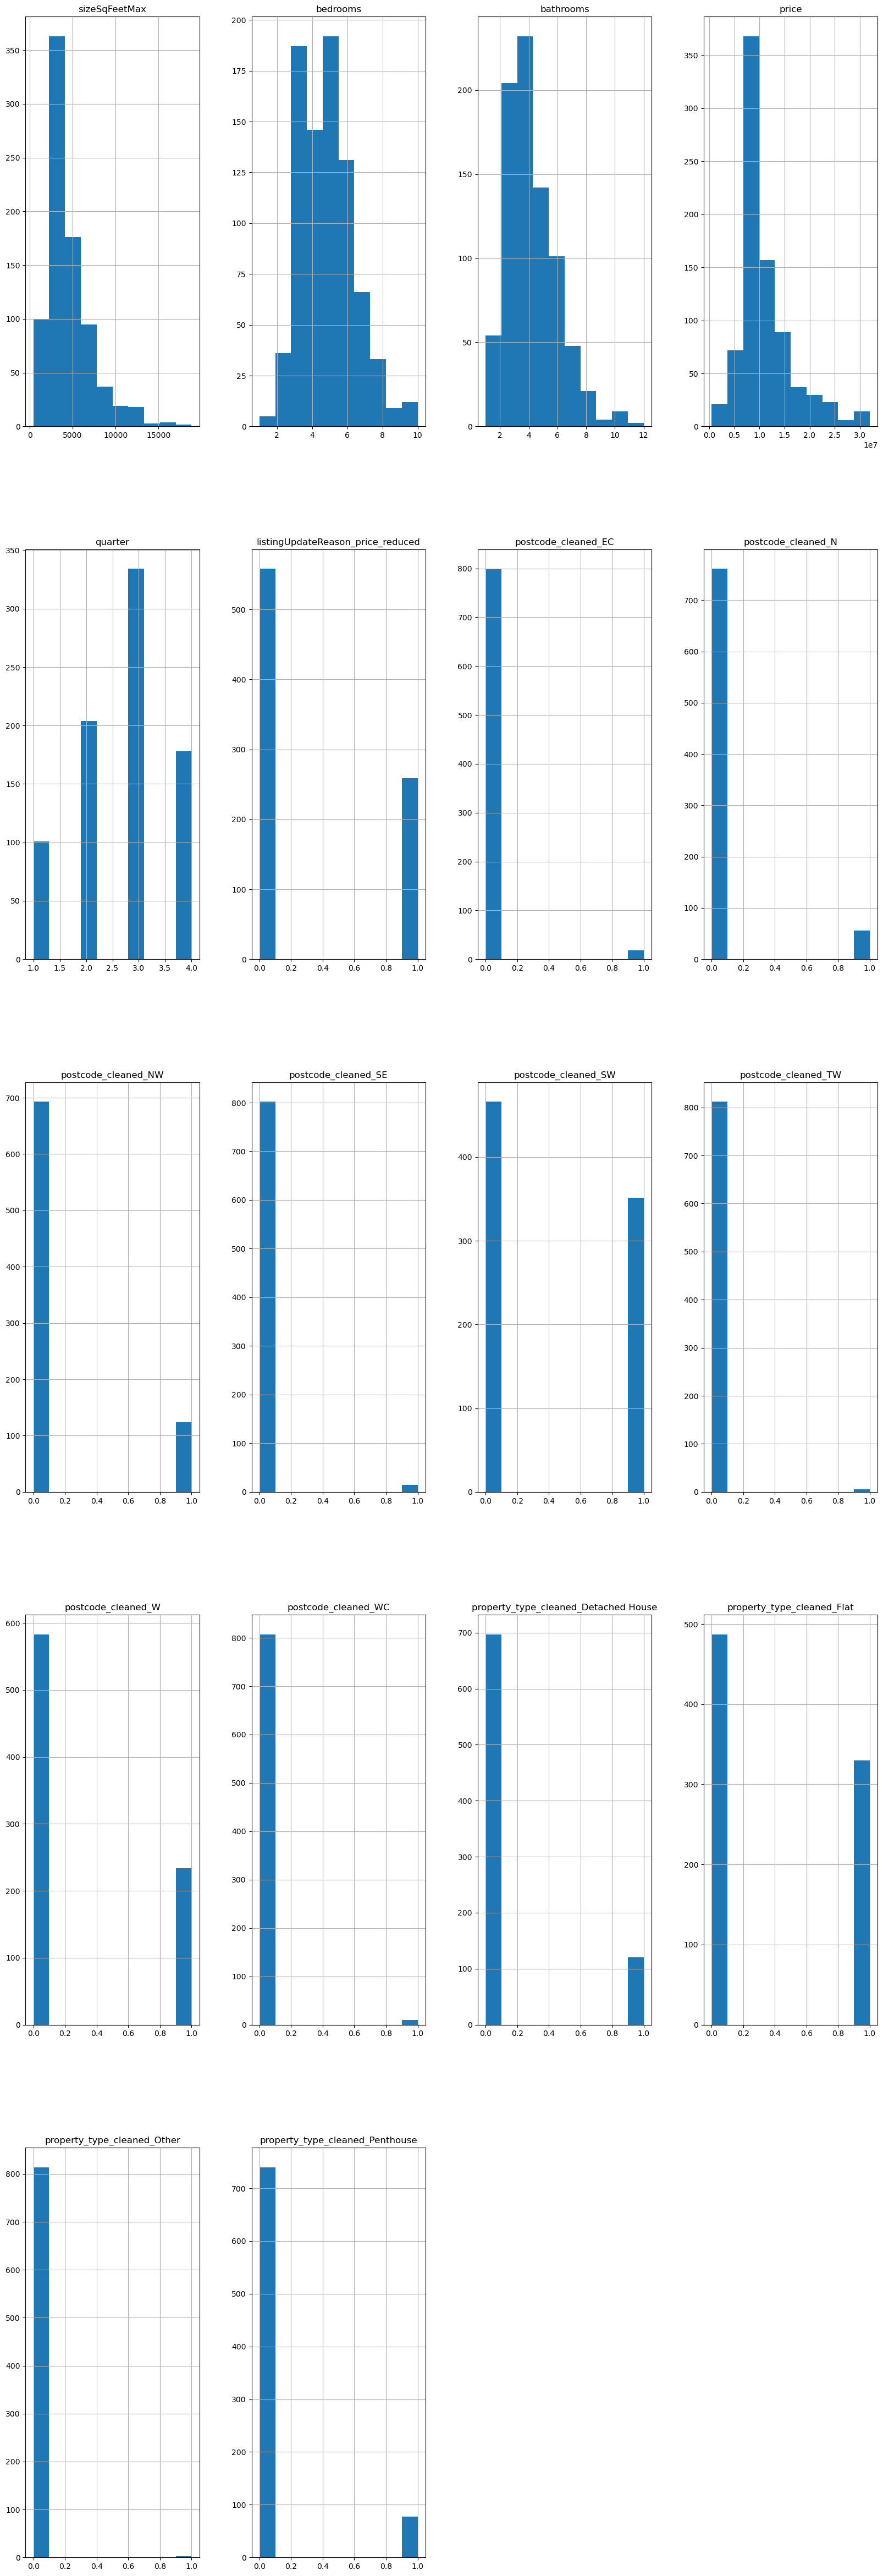

In [37]:
#histograms highlighting effect of new columns added
df.hist(figsize=(20, 60))

<Axes: >

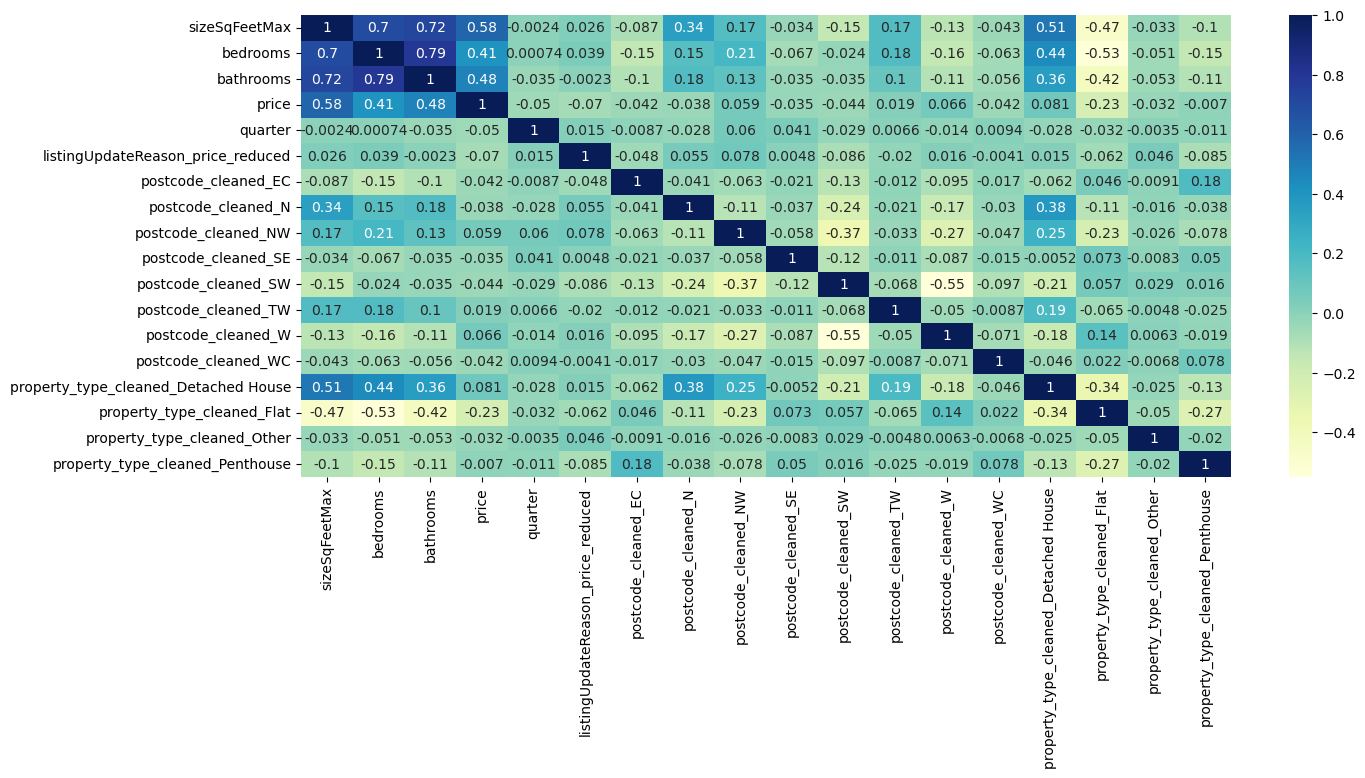

In [38]:
#heatmap to give an idea of most likely important variables
plt.figure(figsize= (15,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")

Examining the heat map, looking along the 'price' row we can see that 'sizeSqFeetMax' (0.60), 'bedrooms' (0.42), and 'bathrooms' (0.49), are all significantly positively correlated with the property price. This is hardly surprising as in general, all else being equal, we would expect bigger houses to be more expensive. We can also see that 'property_type_cleaned_Flat' is negatively correlated with price (-0.25) which again passes the sense check as flats tend on average to be cheaper than houses (or penthouses!).

This does not mean that these four variables most significantly correlating with 'price' will necessarily be the four most important features in our model, however. That very much depends on how each feature overlaps with the others. In particular, 'sizeSqFeetMax', 'bedrooms', and 'bathrooms' are all highly correlated with each other (it is unlikely you would have a home in the top 10% for size have only one bedroom!), and so the decision tree will likely prioritise only one of these three as the most important feature.

[Back to Contents](#Contents)

## 5. Training, Improving, & Testing Model

Finally now the data has been examined, cleaned, and categorised, we are ready to make our model!

[Back to Contents](#Contents)

### 5.1. Training Model

The first thing we need to do is create a function to split our data into training and test sets, set some starting hyperparameters to use as our baseline, and instantiate the DecisionTreeRegressor model from sklearn as below. We can then call the model and while we can do many things with it, the first thing we will look at quickly is the R Squared value of both the test and training sets as quick feedback on the accuracy of the model.

    NOTE: After some fine tuning I have set the parameters below as test_size=0.10 and max_depth=5, however I started with test_size=0.10 and max_depth=5and so I have included those when calling the function below to show the original accuracy of the model.

In [39]:
# Create function for building a decision tree based on data and hyperparameters given

def build_price_decision_tree(df, test_size=0.10, random_state=17, max_depth=5):
    df = df.copy()
    
    # Separate target and features
    y = df['price']
    X = df.drop(columns=['price'])
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Train Decision Tree
    model = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Feature Importances
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    return model, feature_importances, X_train, X_test, y_train, y_test, y, X

In [40]:
### THIS WAS HOW I CALLED THE MODEL ORIGINALLY BUT IT IS NOW USING THE ADJUSTED PARAMETERS AS EXPLAINED ABOVE AND SO HAS 
### BEEN COMMENTED OUT WITH THE ORIGINAL HYPERPARAMETERS TESTED BELOW 

## Call the function to get model and see accuracy (R squared values) of starting parameters
#model, feature_importances, X_train, X_test, y_train, y_test, y, X = build_price_decision_tree(df)
#train_r2 = model.score(X_train, y_train)
#test_r2 = model.score(X_test, y_test)

#print(f"Train R Squared: {train_r2:.2f}, Test R Squared: {test_r2:.2f}")

In [41]:
# Call the function to get model and see accuracy (R squared values) of starting parameters 
model, feature_importances, X_train, X_test, y_train, y_test, y, X = build_price_decision_tree(df, test_size=0.2, max_depth=4)

original_train_r2 = model.score(X_train, y_train)
original_test_r2 = model.score(X_test, y_test)
print(f"Original Train R Squared: {original_train_r2:.3f}, Original Test R Squared: {original_test_r2:.3f}")

Original Train R Squared: 0.572, Original Test R Squared: 0.404


While not horrendous as a starting off point, a R Squared on the test data of 0.4 is definitely not something to write home about and we should definitely look to improve it by fine tuning the model. Such a limited dataset, and data as noisy and varied as house prices (with so many factors like asthetics and neighbourhoods not taken into account), it is unlikely we will be able to make a model that is reliably accurate, that shouldn't stop us from trying to make it as good as possible!

[Back to Contents](#Contents)

###  5.2. Improving the Model by Tuning Hyperparameters

Although there are many hyperparameters that can be tinkered with to optimise results, in this project I shall be focusing on max_depth as the primary hyperparameter to play with. This will generally be the first thing you look at for any decision tree as it is such an important hyperparameter.

To use extreme examples, with a depth of only one a decision tree (stump) will effectively just be an if statement taking the most relevant feature (in this case probably sizeSqFeetMax) into account and be not much use at all. Meanewhile if you leave this unbounded a tree may grow to have as many layers as it does features (even more as numerical features will be divided into a series of over/unders), and each node may have only a couple of entries from the data and the model will end up horrendously overfit.

In this project, we will also be adjusting the test_size, meaning relative size of the split between the training data and test data. While the go to here would tend to be about 0.2 (with 20% of the data used for testing and 80% for training), given the lack of available data I think it is probably worth adjusting this as well to give us more training data. Although this runs the risk of the test data being less representative of the whole, it should help our model by giving it a bit more to work with!

As such, below we first have a for loop testing different depths to see if any of them improve our model signficantly. Originally this was going to be the only tuning I did for this project, but having seen the results I was not happy and so decided to play with the test size as well to try to improve it further. This is why there is one set showing just a changing max_depth and then another both the max_depth and test_size.

In [42]:
# Call the function to get model, feature_importances, and splits
model, feature_importances, X_train, X_test, y_train, y_test, y, X = build_price_decision_tree(df, test_size = 0.2)

# Evaluate different tree depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
for d in depths:
    temp_model = DecisionTreeRegressor(max_depth=d, random_state=17)
    temp_model.fit(X_train, y_train)
    
    train_r2 = temp_model.score(X_train, y_train)
    test_r2 = temp_model.score(X_test, y_test)
    
    feature_importances = pd.Series(temp_model.feature_importances_, index=X_train.columns)
    most_important_feature = feature_importances.idxmax()
    most_important_value = feature_importances.max()

    
    print(f"Depth {d}: Train R Squared={train_r2:.2f}, Test R Squared={test_r2:.2f}, "
          f"Most Important Feature: {most_important_feature} (Importance={most_important_value:.2f})\n")

Depth 1: Train R Squared=0.28, Test R Squared=0.09, Most Important Feature: sizeSqFeetMax (Importance=1.00)

Depth 2: Train R Squared=0.36, Test R Squared=0.19, Most Important Feature: sizeSqFeetMax (Importance=0.89)

Depth 3: Train R Squared=0.47, Test R Squared=0.29, Most Important Feature: sizeSqFeetMax (Importance=0.92)

Depth 4: Train R Squared=0.57, Test R Squared=0.40, Most Important Feature: sizeSqFeetMax (Importance=0.80)

Depth 5: Train R Squared=0.64, Test R Squared=0.37, Most Important Feature: sizeSqFeetMax (Importance=0.76)

Depth 6: Train R Squared=0.72, Test R Squared=0.23, Most Important Feature: sizeSqFeetMax (Importance=0.71)

Depth 7: Train R Squared=0.82, Test R Squared=0.13, Most Important Feature: sizeSqFeetMax (Importance=0.67)

Depth 8: Train R Squared=0.86, Test R Squared=0.06, Most Important Feature: sizeSqFeetMax (Importance=0.65)

Depth 9: Train R Squared=0.90, Test R Squared=-0.28, Most Important Feature: sizeSqFeetMax (Importance=0.63)

Depth 10: Train R 

In [43]:
# Define ranges for test sizes and max_depth
test_sizes = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]
depths = [2, 3, 4, 5, 6, 7, 8]

# Create a list to collect results
results = []

for ts in test_sizes:
    for d in depths:
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=ts, random_state=17
        )
        
        # Train model
        model = DecisionTreeRegressor(max_depth=d, random_state=17)
        model.fit(X_train, y_train)
        
        # Evaluate R Squared
        train_r2 = model.score(X_train, y_train)
        test_r2 = model.score(X_test, y_test)
        
        # Identify most important feature
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
        top_feature = feature_importances.idxmax()
        top_importance = feature_importances.max()
        
        # Append result
        results.append({
            "Test Size": ts,
            "Max Depth": d,
            "Train R Squared": round(train_r2,3 ),
            "Test R Squared": round(test_r2,3)
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test R Squared', ascending=False)

print(results_df.head(10))

    Test Size  Max Depth  Train R Squared  Test R Squared
3        0.10          5            0.607           0.658
6        0.10          8            0.822           0.562
2        0.10          4            0.523           0.553
4        0.10          6            0.698           0.546
5        0.10          7            0.767           0.463
16       0.20          4            0.572           0.404
10       0.15          5            0.628           0.378
17       0.20          5            0.644           0.375
9        0.15          4            0.543           0.361
1        0.10          3            0.426           0.359


In [44]:
# Call model with improved hyperparameters and show improvement from those originally set

model, feature_importances, X_train, X_test, y_train, y_test, y, X = build_price_decision_tree(df, test_size=0.10, max_depth=5)

train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
training_improvement = train_r2 - original_train_r2
test_improvement = test_r2 - original_test_r2

print(f"Original Train R Squared: {original_train_r2:.3f}, Original Test R Squared: {original_test_r2:.3f}")
print(f"Train R Squared: {train_r2:.3f}, Test R Squared: {test_r2:.3f}")
print(f"Improvement to R Squared on Training Data: {training_improvement:.3f}")
print(f"Improvement to R Squared on Test Data: {test_improvement:.3f}")

Original Train R Squared: 0.572, Original Test R Squared: 0.404
Train R Squared: 0.607, Test R Squared: 0.658
Improvement to R Squared on Training Data: 0.035
Improvement to R Squared on Test Data: 0.253


After trialling through a series of max_depths and test_sizes, we have seen that a max_depth of 5, and test_size of 0.10. This lead to a significantly improved R squared value on the test data of 0.658, while maintaining a respectable 0.607 R squared on the training data. This suggests that our model will generally bare an expected house price that is at least similar to the actual house price given a set of input variables. Although this is a long way from being perfect, it is better than it could have been given the paucity of data. From now on then, we will use these hyperparameters in examining the model.

We could continue trying to fine tune the model, for example by changing the maximum number of leaves or minimum node size, but at some point it would just make more sense to use a random forest, and that is outside the scope of this project (but a possible future project on the same or similar data!)

[Back to Contents](#Contents)

### 5.3. Visualising & Examining the Tree

Now we have decided on a max depth of 5 for our tree, it will be interesting to take a quick look at what that actually looks like under the hood, and what decisions are being made. Below we can see this visually in the decsion tree itself, and the full logic being applied in a series of if/else statements that will take us to each leaf predicting a price based on a series if statements. 

Our persistent issue of too little data for too complex a problem (while we have simplified the house pricing process down a lot there are still many features), is clearly demonstrated here and shows us starkly why our model is never going to be the most accurate. Despite limiting the maximum depth of our tree to 5 (again clearly demonstrated below with the 5 rows of decisions (lines) and 6 rows of nodes (boxes), we have so many nodes that many leaves only end up with 1 entry from the training data, and sometimes none at all from the test set.

With such low numbers, we have no idea whether that single entry in for example 'Leaf 4', where sizeSqFeetMax <= 4830.5, sizeSqFeetMax <= 1109.0 (I left both sizeSqFeetMax statements in to demonstrate how the model is calculating the leaf), property_type_cleaned_Penthouse <= 0.5 (is not a penthouse), quarter <= 1.5 is represenatitve enough of other houses that carry similar characteristics for the predicted house price of £7,250,000 to carry any validity at all.

Although this tree that is both reatively shallow and has many leaves with low sample sizes is bad for the accuracy our model, it does at lease make visualising it easier with both the tree diagram and series of if/else statements nicely remonstrating what the Decision Tree Regressor is doing.

We will also take a look at the distribution of the leaves and their predicted prices, and in particular focus on some standout leaves: 'Leaf 6' with the lowest predicted house price, 'Leaf 48' with the highest predicted house price, and 'Leaf 18' with the most training and test samples. This will be interesting to look at just to see what makes up the decision process for the highest and lowest predictions, and what features are so many entries sharing in 'Leaf 18'.

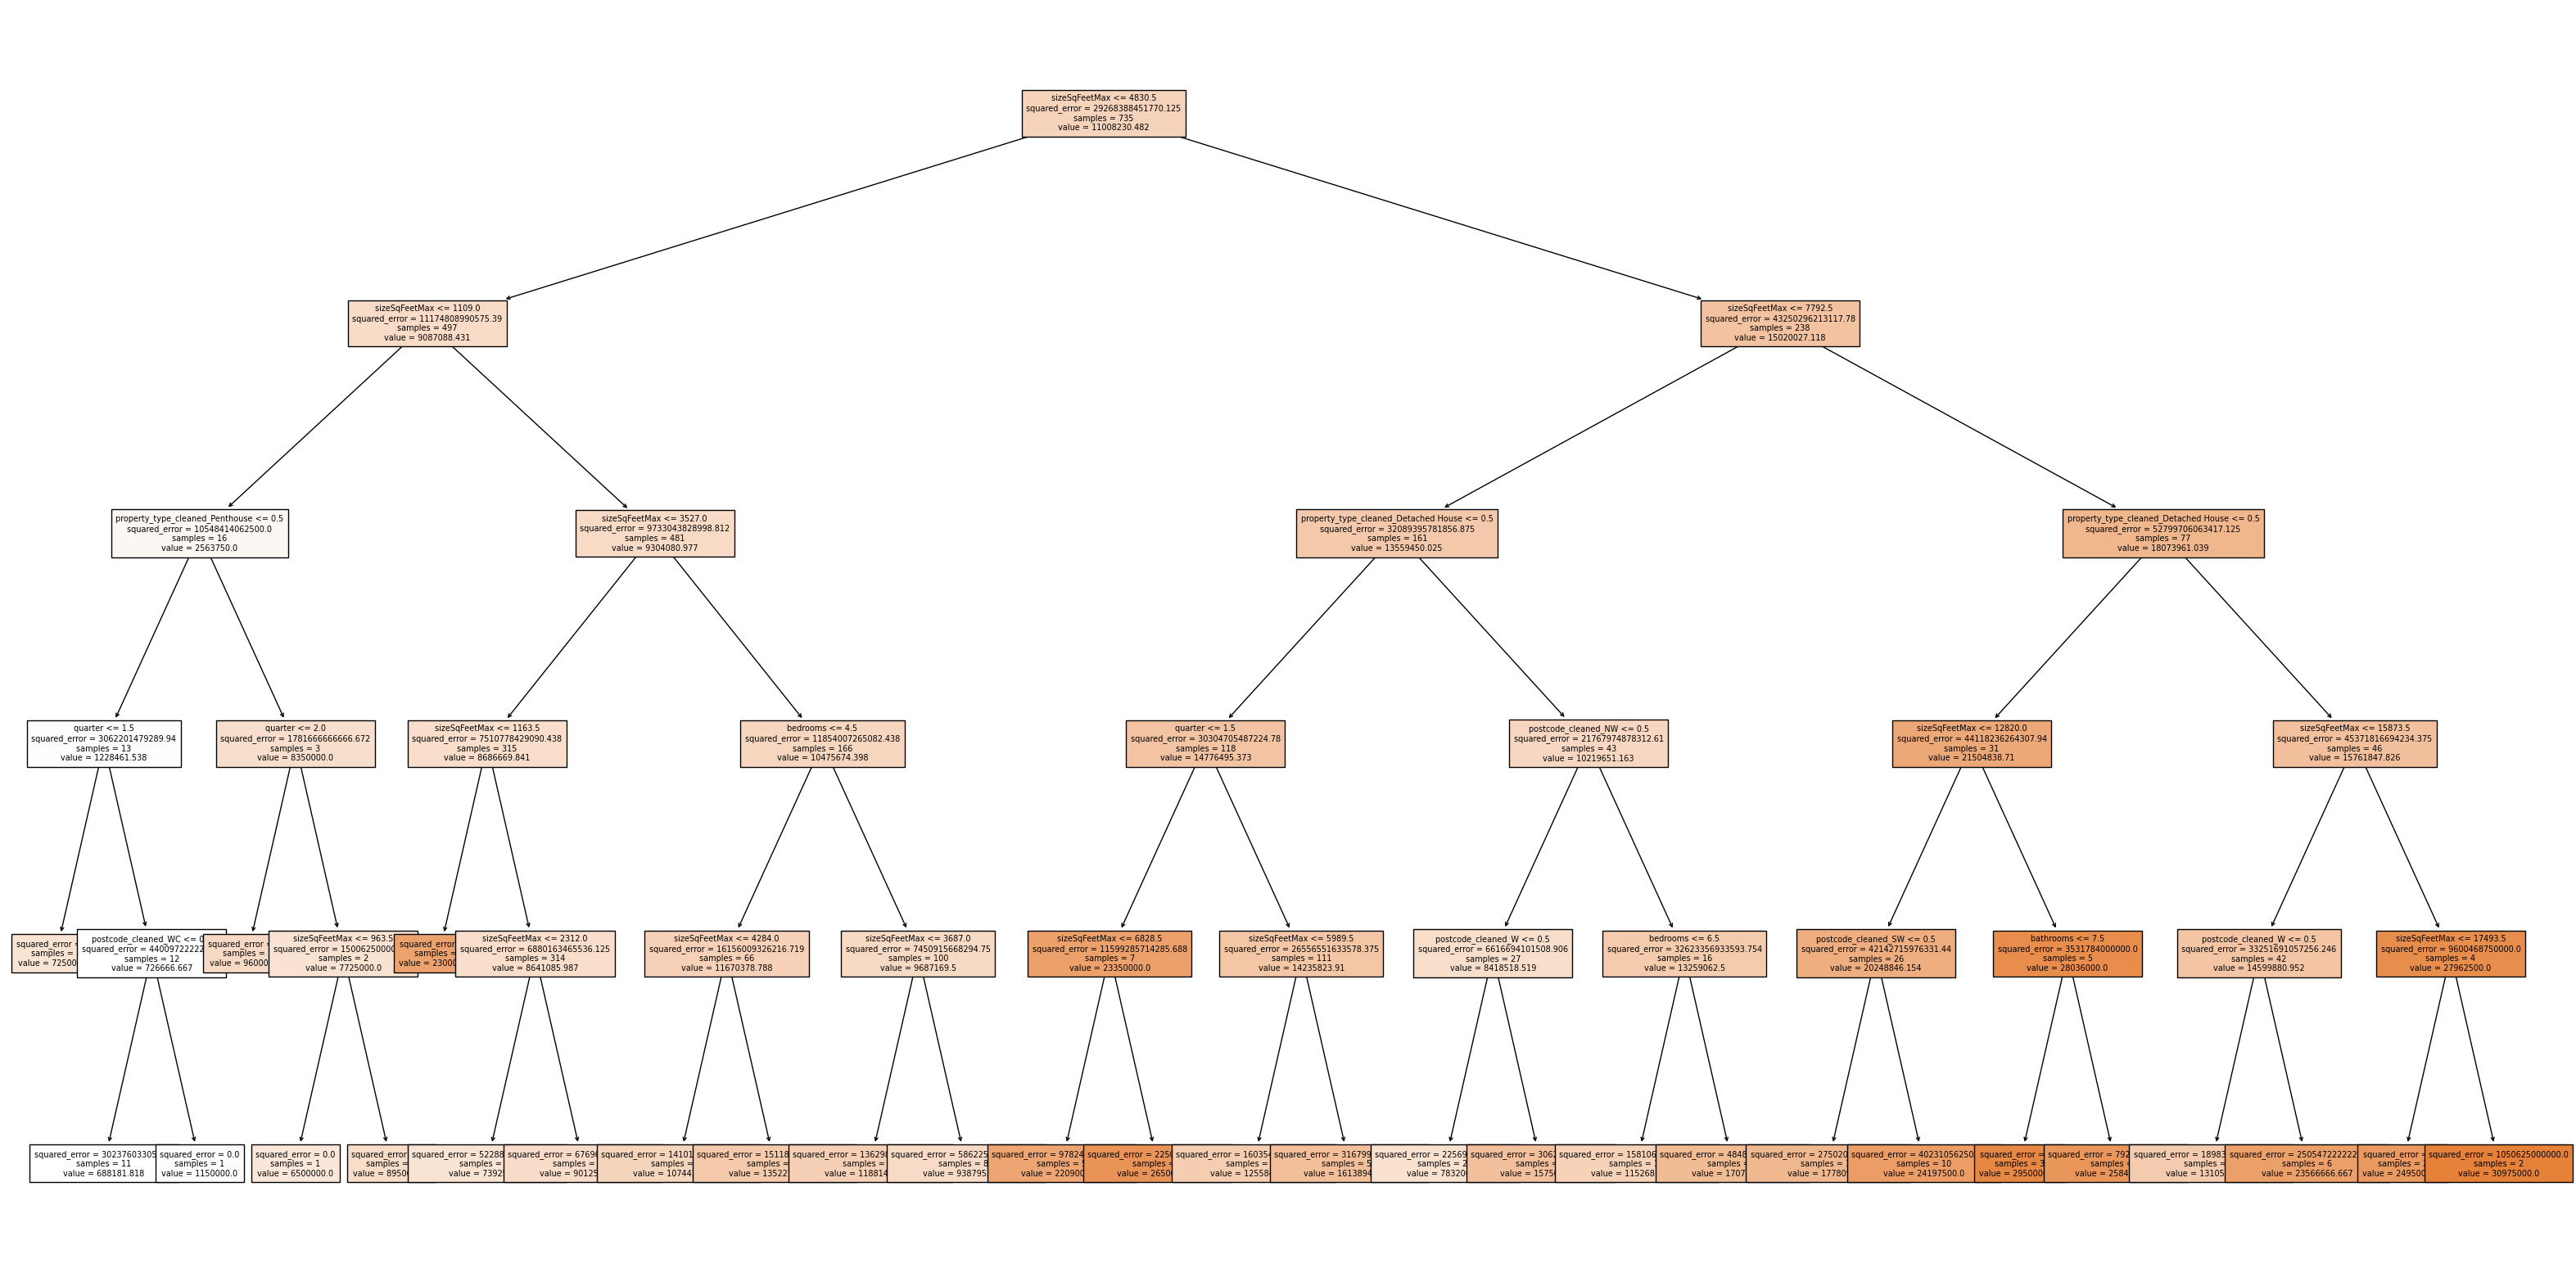

In [45]:
# Visualizing the Tree
plt.figure(figsize=(40, 20))
tree.plot_tree(model, feature_names=X.columns, filled=True, fontsize=7)
plt.show()

In [46]:
    def bold(text):
        return f"\033[1m{text}\033[0m"

In [47]:
def print_tree_rules_with_nodes_and_counts(model, feature_names, X_train, X_test):
    tree = model.tree_

    # Determine which leaf each sample falls into
    train_leaf_indices = model.apply(X_train)
    test_leaf_indices = model.apply(X_test)

    def recurse(node, depth):
        indent = "  " * depth
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            # Internal node
            feature = feature_names[tree.feature[node]]
            threshold = tree.threshold[node]
            print(f"{indent}{(f'Node {node}')}: if {feature} <= {threshold:.1f}")
            recurse(tree.children_left[node], depth + 1)
            print(f"{indent}{(f'Node {node}')}: else (if {feature} > {threshold:.1f})")
            recurse(tree.children_right[node], depth + 1)
        else:
            # Leaf node
            value = tree.value[node][0][0]
            train_count = np.sum(train_leaf_indices == node)
            test_count = np.sum(test_leaf_indices == node)
            print(f"{indent}{bold(f'Leaf {node}')}: Predicted House Price = {bold(f'£{value:,.0f}')}, "
                  f"Training Samples = {bold(train_count)}, Test Samples = {bold(test_count)}")

    recurse(0, 0)


# Example usage
feature_names = list(X_train.columns)
print_tree_rules_with_nodes_and_counts(model, feature_names, X_train, X_test)

Node 0: if sizeSqFeetMax <= 4830.5
  Node 1: if sizeSqFeetMax <= 1109.0
    Node 2: if property_type_cleaned_Penthouse <= 0.5
      Node 3: if quarter <= 1.5
        Leaf 4: Predicted House Price = £7,250,000, Training Samples = 1, Test Samples = 0
      Node 3: else (if quarter > 1.5)
        Node 5: if postcode_cleaned_WC <= 0.5
          Leaf 6: Predicted House Price = £688,182, Training Samples = 11, Test Samples = 2
        Node 5: else (if postcode_cleaned_WC > 0.5)
          Leaf 7: Predicted House Price = £1,150,000, Training Samples = 1, Test Samples = 0
    Node 2: else (if property_type_cleaned_Penthouse > 0.5)
      Node 8: if quarter <= 2.0
        Leaf 9: Predicted House Price = £9,600,000, Training Samples = 1, Test Samples = 0
      Node 8: else (if quarter > 2.0)
        Node 10: if sizeSqFeetMax <= 963.5
          Leaf 11: Predicted House Price = £6,500,000, Training Samples = 1, Test Samples = 0
        Node 10: else (if sizeSqFeetMax > 963.5)
          Leaf 12: Pred

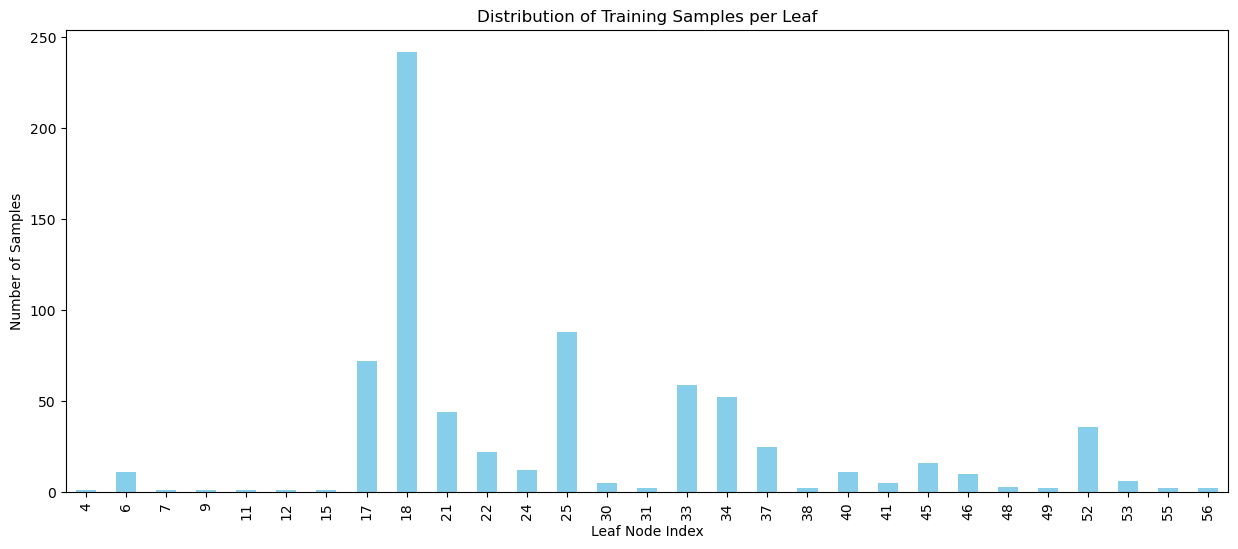

In [48]:
train_leaf_indices = model.apply(X_train)
train_leaf_counts = pd.Series(train_leaf_indices).value_counts().sort_index()

plt.figure(figsize=(15, 6))
train_leaf_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Training Samples per Leaf")
plt.xlabel("Leaf Node Index")
plt.ylabel("Number of Samples")
plt.show()

In [49]:
print(f"Mean samples per leaf: {train_leaf_counts.mean():,.2f}")
print("Min samples per leaf:", train_leaf_counts.min())
print("Max samples per leaf:", train_leaf_counts.max())

Mean samples per leaf: 25.34
Min samples per leaf: 1
Max samples per leaf: 242


In [50]:
# Get leaf indices for each test sample
leaf_indices = model.apply(X_test)

# Get predictions for each test sample
y_pred = model.predict(X_test)


In [51]:
# Combine X_test features, predicted price, and leaf index
leaf_analysis = X_test.copy()
leaf_analysis['Predicted Price'] = y_pred
leaf_analysis['Leaf Node'] = leaf_indices

# Sort by Leaf Node for readability
leaf_analysis = leaf_analysis.sort_values(by='Leaf Node')

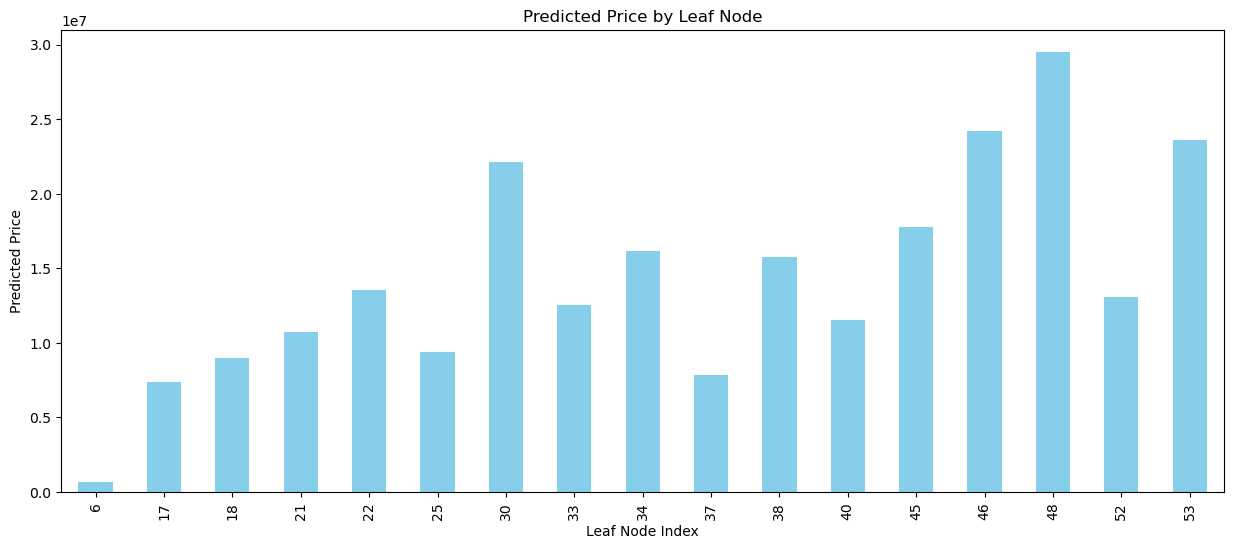

In [52]:
leaf_summary = leaf_analysis.groupby('Leaf Node').agg(
    Count=('Predicted Price', 'size'),
    Avg_Predicted_Price=('Predicted Price', 'mean')
)

leaf_summary.sort_index()['Avg_Predicted_Price'].plot(kind='bar', figsize=(15,6), color='skyblue')
plt.title('Predicted Price by Leaf Node')
plt.xlabel('Leaf Node Index')
plt.ylabel('Predicted Price')
plt.show()

In [53]:
# Which leaf each sample from train/test belongs to
train_leaf_indices = model.apply(X_train)
test_leaf_indices = model.apply(X_test)

In [54]:
def get_leaf_path(tree, node_id, feature_names):
    path = []
    while node_id != 0:
        # Find parent node
        parent = np.where((tree.children_left == node_id) | (tree.children_right == node_id))[0][0]
        feature = feature_names[tree.feature[parent]]
        threshold = tree.threshold[parent]
        
        # Determine direction
        if tree.children_left[parent] == node_id:
            condition = f"{feature} <= {threshold:,.2f}"
        else:
            condition = f"{feature} > {threshold:,.2f}"
        
        path.insert(0, condition)
        node_id = parent
    return " AND ".join(path)

In [55]:
def analyze_selected_leaves(model, X_train, X_test, leaves, feature_names):
    tree = model.tree_
    results = []
    
    train_leaf_indices = model.apply(X_train)
    test_leaf_indices = model.apply(X_test)
    
    for leaf in leaves:
        path = get_leaf_path(tree, leaf, feature_names)
        predicted_price = tree.value[leaf][0][0]
        train_count = np.sum(train_leaf_indices == leaf)
        test_count = np.sum(test_leaf_indices == leaf)
        
        results.append({
            "Leaf": leaf,
            "Decision Path": path,
            "Predicted Price": round(predicted_price, 2),
            "Train Samples": train_count,
            "Test Samples": test_count
        })
    
    return pd.DataFrame(results)

In [56]:
feature_names = list(X_train.columns)
selected_leaves = [6, 48, 18]

leaf_summary = analyze_selected_leaves(model, X_train, X_test, selected_leaves, feature_names)

# Identify special leaves
lowest_price_leaf = leaf_summary.loc[leaf_summary['Predicted Price'].idxmin()]
highest_price_leaf = leaf_summary.loc[leaf_summary['Predicted Price'].idxmax()]
most_samples_leaf = leaf_summary.loc[(leaf_summary['Train Samples'] + leaf_summary['Test Samples']).idxmax()]

# Print descriptive summaries
print(f"Leaf {lowest_price_leaf['Leaf']}, with the lowest predicted price (£{lowest_price_leaf['Predicted Price']:,.2f}), "
      f"has {int(lowest_price_leaf['Train Samples'])} train samples and {int(lowest_price_leaf['Test Samples'])} test samples.\n"
      f"Decision Path: {lowest_price_leaf['Decision Path']}\n")

print(f"Leaf {highest_price_leaf['Leaf']}, with the highest predicted price (£{highest_price_leaf['Predicted Price']:,.2f}), "
      f"has {int(highest_price_leaf['Train Samples'])} train samples and {int(highest_price_leaf['Test Samples'])} test samples.\n"
      f"Decision Path: {highest_price_leaf['Decision Path']}\n")

print(f"Leaf {most_samples_leaf['Leaf']}, with the most total samples ({int(most_samples_leaf['Train Samples'] + most_samples_leaf['Test Samples'])}), "
      f"has {int(most_samples_leaf['Train Samples'])} train samples and {int(most_samples_leaf['Test Samples'])} test samples, "
      f"and a predicted price of £{most_samples_leaf['Predicted Price']:,.2f}.\n"
      f"Decision Path: {most_samples_leaf['Decision Path']}\n")

Leaf 6, with the lowest predicted price (£688,181.82), has 11 train samples and 2 test samples.
Decision Path: sizeSqFeetMax <= 4,830.50 AND sizeSqFeetMax <= 1,109.00 AND property_type_cleaned_Penthouse <= 0.50 AND quarter > 1.50 AND postcode_cleaned_WC <= 0.50

Leaf 48, with the highest predicted price (£29,500,000.00), has 3 train samples and 1 test samples.
Decision Path: sizeSqFeetMax > 4,830.50 AND sizeSqFeetMax > 7,792.50 AND property_type_cleaned_Detached House <= 0.50 AND sizeSqFeetMax > 12,820.00 AND bathrooms <= 7.50

Leaf 18, with the most total samples (269), has 242 train samples and 27 test samples, and a predicted price of £9,012,566.12.
Decision Path: sizeSqFeetMax <= 4,830.50 AND sizeSqFeetMax > 1,109.00 AND sizeSqFeetMax <= 3,527.00 AND sizeSqFeetMax > 1,163.50 AND sizeSqFeetMax > 2,312.00



Just taking a quick look at these three notable leaves, we can see that a large number of the decision making is based on the square footage of the property on sale, and so as expected from the heatmap, this seems to be the predominant feature our model is predicting house prices based on. We will look cloers at this, and quantify it, in the next section.

[Back to Contents](#Contents)

### 5.4. Comparing Feature Importance

We have now fine tuned our model, and examined exactly what is going on in the decision making process of our tree, so now it is worth zooming out to see which features in our model are driving the driving the house price it predicts. As expeected, the most important feature is sizeSqFeetMax with that overwhelmingly dominant in our model's price predicitions. 

What perhaps wouldn't be expected though, based on how the number of bedrooms and number of bathrooms are also correlated to house prices and to similar (although lower) degrees than the property sixe, is how dominant sizeSqFeetMax is in our model and hour relatively insignificant these features in particular are. This is almost certainly because these features themselves (a properties size, the number of bathrooms it has, and the number of bedrooms it has), are in fact highly correlated. This means that if our model categorises based on size (say looking at properties under 1109sqft as with 'Leaf 6' above) it will most of the time also incidentally categorise based on number of bedrooms or bathrooms as well (you are unlikely to have an 8 bedroom mansion in such a small property as those in 'Leaf 6'). 

This similarly rolls over to number of bedrooms and bathrooms being highly correlated with each other as well. And so, we can see that the size of the property is massively important in our model, the number of bedrooms has a small but notable effect on our model, while the number of bathrooms has almost no impact. This does not mean that if all the information we had was the number of bathrooms in a number of properties we wouldn't be able to make any inferences about their price, but simply that these inferences are all already taken account for by the properties' size and numbers of bedrooms!

Given the low number of data entries, I would say that it is by no means conclusive to say that some of the features that show less important but non-zero effect on our predicted price, such as 'postcode_cleaned_W', 'postcode_cleaned_SW', and 'quarter', but it would be interesting to see if this pattern continues with more data and helps us draw conclusions about the prices of properties from them! 'Property_type_cleaned_Detached House' though, shows both an increased importance in our model, and fits with preconceived ideas of property prices (that detached houses are generally more expensive than terraced house or flats) and so while we still need to conduct further stufy, I am more confident in saying that this will be a useful indicator of property prices moving forwards.

In [57]:
print("Most Important Features:")
print(feature_importances)

Most Important Features:
                                 feature  importance
0                          sizeSqFeetMax    0.737854
13  property_type_cleaned_Detached House    0.096884
11                    postcode_cleaned_W    0.051988
3                                quarter    0.045072
1                               bedrooms    0.020063
9                    postcode_cleaned_SW    0.019402
7                    postcode_cleaned_NW    0.018026
16       property_type_cleaned_Penthouse    0.009466
2                              bathrooms    0.001231
12                   postcode_cleaned_WC    0.000015
6                     postcode_cleaned_N    0.000000
5                    postcode_cleaned_EC    0.000000
10                   postcode_cleaned_TW    0.000000
4      listingUpdateReason_price_reduced    0.000000
14            property_type_cleaned_Flat    0.000000
15           property_type_cleaned_Other    0.000000
8                    postcode_cleaned_SE    0.000000


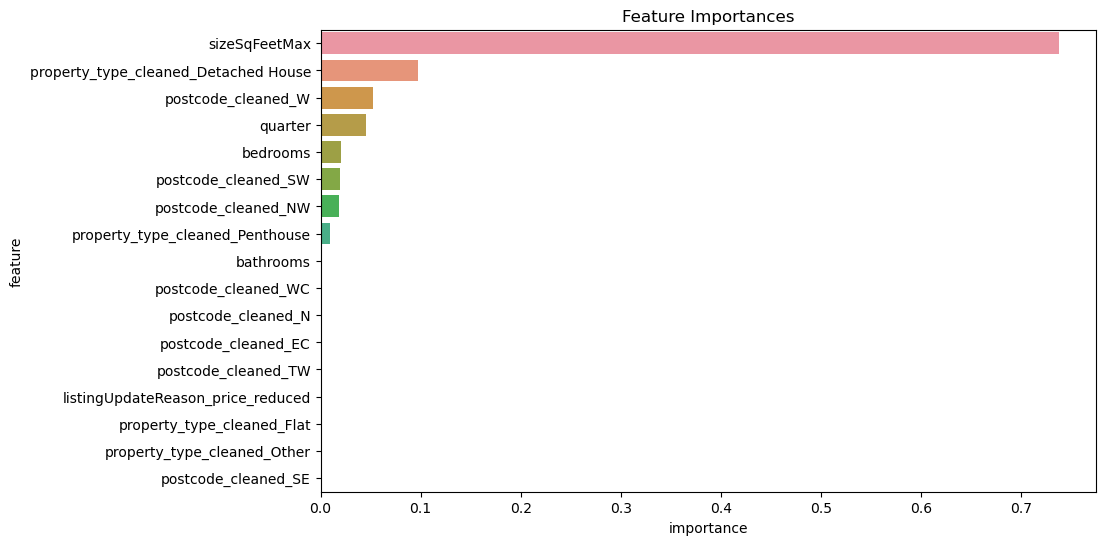

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


[Back to Contents](#Contents)

### 5.5. Assessing Tuned Model Accuracy

We know what general correlation there is between our model's predicted prices and the actual prices observed within the test data with an R Squared of 0.66, but that is very abstract and does not tell us what that means in terms of the actual accuracy of the property prices observed. As such, below we will first take a look at the predicted prices vs actual ones on the test data, then a look at the error distribution to get a gauge on how how accurate the majority of our predictions are, and then finally look at the most extreme prediction errors and overall error in monetary and % terms.

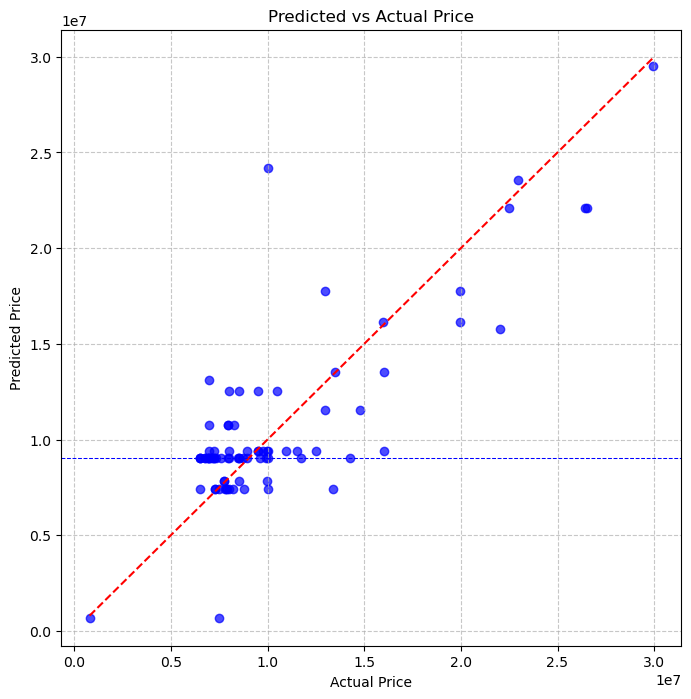

In [59]:
# Generate predictions from model
y_test_pred = model.predict(X_test)

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price')
plt.grid(linestyle='--', alpha=0.7) 
plt.axhline(9012566.12, color='blue', linestyle='--', linewidth=.75, label='Leaf 18')
plt.show()

Firstly looking at our plot of predicted vs actual prices on the test data we can very much see visually that, as our R squared of 0.66 tells us, our model is far more accurate than either randomly assigning house prices, or guessing that every house price is going to be the mean of the training data. While this is the bare minimum for a predictive model, it is nice to see demonstrated that there is clearly a correlation between our expected and observed prices, even if we can also see from this chart that it is by no means even close to perfect. Also quite nicely observable from our plot is that we have horizontal lines of batches of properties that all have the same predicted price. This is natural and what we would expect to see from a decision tree regressor, and simply shows a group of properties that have ended up on the same leaf of our tree. I have demonstrated this by adding a blue dotted line showing our most common leaf 'Leaf 18' with a predicted price of £9,012,566.12. Here you can see all of the entries whose properties have lead them to have this predicted price in our model, with their actual prices varying as we would expect.

In [60]:
# Error distribution
errors = y_test - y_test_pred

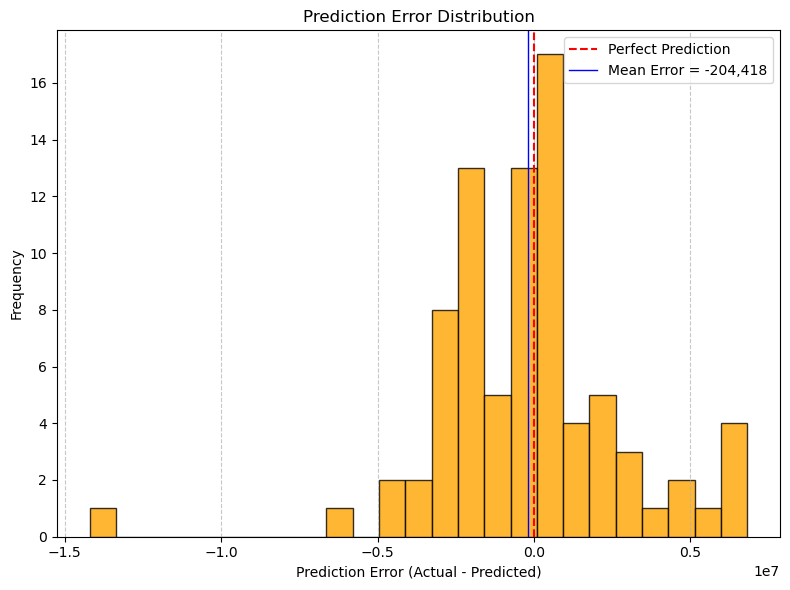

In [61]:
# Error Distribution
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=25, color='orange', edgecolor='black', alpha=0.8)  
plt.axvline(0, color='red', linestyle='--', linewidth=1.5, label='Perfect Prediction')
plt.axvline(errors.mean(), color='blue', linestyle='-', linewidth=1, label=f'Mean Error = {errors.mean():,.0f}')

plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

Next we can see from our error distribution a broadly symmetrical set of errors with no obvious slant towards over or under predicting prices, as demonstrated with a mean of our errors of just -£204,418 (where the error is the actual price minus the predicted price), meaning that on average our predictions just slightly over estimate actual property prices. This does not mean though that on average our predictions are only £204,418 out as we will see from our final summary statistics, only that our over predictions are mostly balanced out by our under predictions.

In [62]:
# Biggest Under Prediction
max_error_idx = errors.idxmax()
max_error = errors[max_error_idx]
actual_price = y_test.loc[max_error_idx]
predicted_price = y_test_pred[list(y_test.index).index(max_error_idx)]
under_percent_error = ((predicted_price - actual_price) / actual_price) * 100

print(f"Largest Under Prediction")
print(f"    Predicted Price: £{predicted_price:,.2f}")
print(f"    Actual Price: £{actual_price:,.2f}")
print(f"    Under Predicted by: £{abs(max_error):,.2f}")
print(f"    Under Prediction Percentage: {abs(under_percent_error):.2f}%\n")


# Biggest Over Prediction
min_error_idx = errors.idxmin()
min_error = errors[min_error_idx]
actual_price_min = y_test.loc[min_error_idx]
predicted_price_min = y_test_pred[list(y_test.index).index(min_error_idx)]
over_percent_error = ((predicted_price_min - actual_price_min) / actual_price_min) * 100

print(f"Largest Over Prediction")
print(f"    Predicted Price: £{predicted_price_min:,.2f}")
print(f"    Actual Price: £{actual_price_min:,.2f}")
print(f"    Over Predicted by: £{abs(min_error):,.2f}")
print(f"    Over Prediction Percentage: {abs(over_percent_error):.2f}%\n")

# Final Evaluation
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mean_predicted_price = y_test_pred.mean()
mean_actual_price = y_test.mean()
mape = (abs(errors / y_test).mean()) * 100

print(f"Mean Actual Price: £{mean_actual_price:,.2f}")
print(f"Mean Predicted Price: £{mean_predicted_price:,.2f}")
print(f"Mean Error (with over and under predictions cancelling each other out): £{errors.mean():,.2f}")
print(f"Mean Absolute Error: £{mae:,.2f}")
print(f"Mean Absolute % Error: {mape:.2f}%")

Largest Under Prediction
    Predicted Price: £688,181.82
    Actual Price: £7,500,000.00
    Under Predicted by: £6,811,818.18
    Under Prediction Percentage: 90.82%

Largest Over Prediction
    Predicted Price: £24,197,500.00
    Actual Price: £10,000,000.00
    Over Predicted by: £14,197,500.00
    Over Prediction Percentage: 141.97%

Mean Actual Price: £10,409,439.02
Mean Predicted Price: £10,613,857.31
Mean Error (with over and under predictions cancelling each other out): £-204,418.29
Mean Absolute Error: £2,088,381.13
Mean Absolute % Error: 21.77%


To work out the real, practical, useful average magnitude of error of our predictions (rather than the average of our errors), we need to take the mean of the absolute value of our errors to avoid our over and under predictions cancelling each other out. When doing this below we find that our mean absolute error is £2,088,381.13, which with a mean actual house price on the data of £10,409,439.02 means that on average each of our predicted house prices is 21.77% out. In other words, while our model is much better than throwing a price-dart at a valuation dartboard, or by guessing every property is valued at the mean valuation in the training data, you wouldn't want to use it instead of getting a professional to value your house before putting it on the market!

This pretty much wraps up evaluating our model, but one final point worth drawing attention to is the difference between precision and accuracy and how easy it is to be misled by incredibly precise, but horrendously inaccurate predictions. We can see this clearly above as as well as the average errors, I have included the biggest under and over predictions on our test set from our model.

While these are important to highlight in their own right to demonstrate the extreme errors we can see that often get hidden or forgotten about behind the average figures (yes, overall our model might on average be around 21% over or under the actual property price but included in that is a 91% under prediction and 142% over prediction), our largest under prediction in particular is a perfect example of accuracy vs precision. At first glance, a predicted price for a property of £688,181.82 could easily fool you into thinking that the model must be pretty confident of the answer if it is giving a value as large as a house price to two decimal places, but this is an illusion. Our model is simply giving the predicted price to this precision because its leaf happened to have a selection of values that averaged out to not give a nice whole number. This increased precision is by no means an indication that our model is in any way 'extra confident' of these predictions, and it absolutely should not be read as such, as tempting as it is to be tricked by such a precise value.

[Back to Contents](#Contents)

## 6. Simple Linear Regression Model using Area for Comparison

As the above decision tree model could definitely have been more accurate, here I am just having a quick look at a linear regression model using only 'sizeSqFeetMax' which was by far the most important feature in its predictions. This I will use to just sense-check whether the above model could be radically improved with the available data. This is only done as a quick test without additional features being added and tested as this project is primarily focused on using decision tree regression, but it will be interesting to have just a quick glance to see whether a much simpler model would have been more appropriate given the available data.

In [63]:
# Feature and target
X = df[['sizeSqFeetMax']] 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

In [65]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Predictions
y_pred = model_linear.predict(X_test)

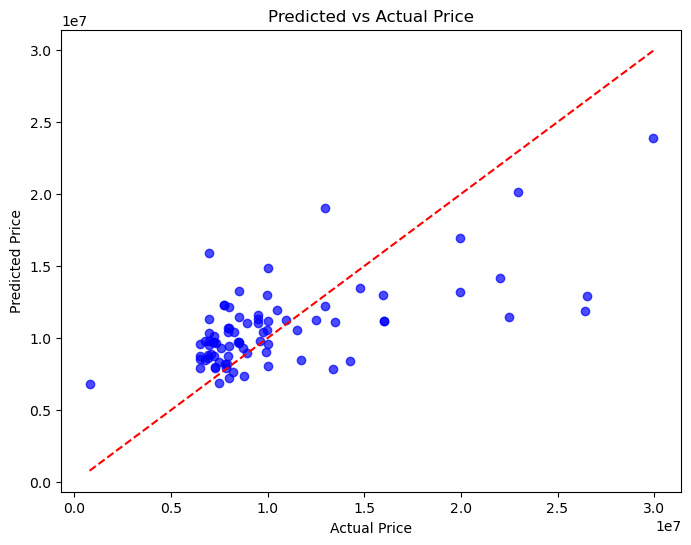

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Price')
plt.show()

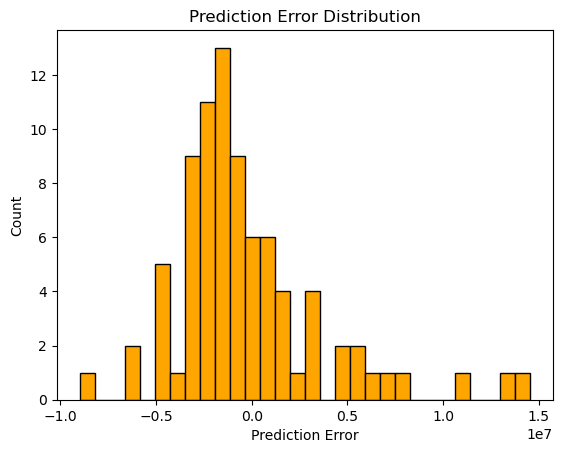

In [67]:
errors_linear = y_test - y_pred
plt.hist(errors_linear, bins=30, color='orange', edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Prediction Error Distribution")
plt.show()

In [68]:
mae_linear = mean_absolute_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
mean_predicted_price = y_test_pred.mean()
mean_actual_price = y_test.mean()
mape_linear = (abs(errors_linear / y_test).mean()) * 100

print(f"R Squared Score: {r2_linear:.2f}")
print(f"Mean Absolute Error: £{mae_linear:,.2f}")
print(f"Mean Absolute % Error: {mape_linear:.2f}%")

R Squared Score: 0.41
Mean Absolute Error: £2,846,620.42
Mean Absolute % Error: 35.15%


Thankfully despite the limitations of our decision tree regressor it still performed significantly better than a simple linear regression using 'sizeSqFeetMax' to predict property prices, with our decision tree model on average around £750,000, or 13.5%, closer to the actual property prices in our test data with its predictions than the linear regression. 

[Back to Contents](#Contents)

## 7. Conclusions & Next Steps

Overall while the data we were using was fairly limited, and so we were unable to create a decision tree regressor that could reliably predict house prices (to say 95% of the time within 5% of what they would actually be valued at given a set of properties), I am happy with how this project has turned out. While it would have been nice to produce a model that could be genuinely useful in the real world, for example to test valuations as an estate agent to improve processes, or identify dramatically underpriced properties for investment purposes, our decision tree was still a dramatic improvement over a simple linear regression by square footage. It also allowed us to demonstrate cleaning data, tuning models, and evaluating them.

Moving forward the most obvious and often repeated would be to acquire more data. This would likely allow us to build a much more accurate model just looking at the features we included, and even potentially scrape for additional features such as lookig in the descriptions of properties for key words as mentioned in '2. Reading in Data & First Look'. More data isn't the only thing we could do to improve our model though, and in fact is often not an option. We could instead (or as well as!) turn to a random forests.

Random forests are (often very large) series of decision trees that instead of trying to create the optimum decision tree first time, cycle through a random selection of features at each decision node, which means that although the feature the node branches at that point may seem nonoptimal in the moment, it could lead to a more optimal decision pathway overall. 

Aside from these two large improvements, if the data and model in this project were going to be repeatedly used for real life application, we would make some whole scale structural changes. First of all, we would split the data processing and cleaning into one file and our modelling in another, with the data side producing a nice, easily useable, data file for the modelling side to have access to as needed. This would reduce the run time for each side when adjustments were needed to be made, and would also just be a lot cleaner and reduce human errors that are very easy to creep in when adjusting a file this size with so many moving parts. As for the two sides themselves, I would put a lot of the work we did in to functions and spend some time collecting and renaming variables to avoid potential slip ups when running different sections at different times. For the purposes of walking through the stages that go into making an effective decision tree regressor though, I am very happy with this slightly less efficient, but more linear, step-by-step approach.

[Back to Contents](#Contents)